In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 드라이브 마운트
drive.mount('/content/drive')

# ✅ CSV 경로 지정
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ CSV 불러오기
try:
    df = pd.read_csv(file_path, encoding='cp949')
except:
    df = pd.read_csv(file_path, encoding='utf-8')

# ✅ 기본 정보 출력
print("✅ 데이터 행 수:", df.shape[0])
print("✅ 컬럼 목록:", list(df.columns))
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 데이터 행 수: 5702
✅ 컬럼 목록: ['시설구분', '요금구분', 'L/i(BM)', '체납구분1', ' 체납구분2 ', '매출구분', '실적채널', '고알프', '설치주소', '정지일수', '정지일수 구간', '종료희망일 초과 여부', '월정료 구간', '관리본부명', '관리지사명', '고객번호', '계약번호', '서비스번호', '서비스(대)', '서비스(중)', '서비스(소)', '상호', '고객구분', '사업용구분', '계약상태(대)', '설치주소.1', 'KTT월정료', '계약시작일', '계약종료일', '영업자명', '정지시작일자', '정지희망종료일', '계약최초서비스게시일', '영업구역정보', '최종해제일시', '최종경계일시', '최종신호', '최종수신일시', '분석(S)', '분석(4.17)', '지사취합(4.17)', ' 2월처리계획 ', ' 2월 특이사항 ']


,시설구분,요금구분,L/i(BM),체납구분1,체납구분2,매출구분,실적채널,고알프,설치주소,정지일수,...,영업구역정보,최종해제일시,최종경계일시,최종신호,최종수신일시,분석(S),분석(4.17),지사취합(4.17),2월처리계획,2월 특이사항
0,대상,대상,L형,체납정지(0401),"264,000",NaN,SP,N,경기 양평군 양서면 대심리 123-21,61,...,G000604,2021/05/03?16:19:57,2021/05/03?16:19:49,국선체크,2025/05/07?10:23:19,체납정지,체납정지,0,-,-
1,대상,대상,L형,KTT일반정지,-,NaN,SP,N,서울 종로구 충신동 27-56번지 우리빌딩6층,59,...,G000406,2025/05/07?10:22:49,2025/05/02?18:22:11,해제?(2번),2025/05/07?10:22:49,해지대상,해지대상,0,기타(특이사항참고),기타(특이사항기록)_
2,대상,대상,L형,체납정지(0102),"232,540",NaN,SP,N,경기 파주시 산남동 305-16 창고,59,...,G000306,2025/05/07?10:19:15,2025/05/06?18:42:56,해제?(3번),2025/05/07?10:19:15,체납정지,체납정지,0,-,-
3,대상,대상,L형,KTT직권정지,"129,250",NaN,SP,N,서울 중랑구 망우2동 491-37번지1층,91,...,G000104,2025/05/06?10:49:31,2025/05/06?22:15:57,국선체크,2025/05/07?10:15:55,체납직권정지(부실),체납직권정지(부실),0,2개월체납,-
4,대상,대상,L형,체납정지(0301),"188,104",NaN,SP,N,서울 종로구 팔판동 70번지,61,...,G000407,2025/05/07?10:03:41,2025/05/07?10:13:21,경계?(2번),2025/05/07?10:13:21,체납정지,체납정지,0,3개월체납,-


In [ ]:
# ✅ 결측치 확인
missing = df.isnull().sum()
print("✅ 결측치 요약:\n", missing[missing > 0])

# ✅ 주요 수치 통계
print("\n✅ 정지일수 통계:\n", df['정지일수'].describe())
print("\n✅ 월정료 통계:\n", df['KTT월정료'].describe())

✅ 결측치 요약:
 체납구분1         1132
매출구분          5573
고알프             19
설치주소            17
상호               2
설치주소.1          19
영업자명             9
최종해제일시        5474
최종경계일시        5470
최종신호          5455
최종수신일시        5455
분석(S)         1141
분석(4.17)      1141
지사취합(4.17)    1141
 2월처리계획       1141
 2월 특이사항      1141
dtype: int64

✅ 정지일수 통계:
 count    5702.000000
mean      147.169765
std       293.229276
min         0.000000
25%        59.000000
50%        61.000000
75%        92.000000
max      2502.000000
Name: 정지일수, dtype: float64

✅ 월정료 통계:
 count    5.702000e+03
mean     6.594970e+04
std      9.368565e+04
min      3.896000e+03
25%      2.750000e+04
50%      4.600000e+04
75%      7.000000e+04
max      2.430000e+06
Name: KTT월정료, dtype: float64


In [ ]:
# ✅ 본부/지사별 계약 건수 요약
count_summary = df.groupby(['관리본부명'])['계약번호'].nunique().reset_index()
count_summary = count_summary.rename(columns={'계약번호': '계약건수'})
display(count_summary.sort_values(by='계약건수', ascending=False))

,관리본부명,계약건수
0,강남/서부본부,1615
1,강북/강원본부,1183
4,전남/전북본부,1097
3,부산/경남본부,731
2,대구/경북본부,661
5,충남/충북본부,415


In [ ]:
# 숫자형 처리
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')

# ✅ 평균 정지일수 & 월정료
mean_summary = df.groupby(['관리본부명']).agg({
    '정지일수': 'mean',
    'KTT월정료': 'mean',
    '계약번호': 'nunique'
}).reset_index()
mean_summary = mean_summary.rename(columns={
    '정지일수': '평균 정지일수',
    'KTT월정료': '평균 월정료',
    '계약번호': '계약건수'
})

display(mean_summary.sort_values(by='평균 정지일수', ascending=False))

,관리본부명,평균 정지일수,평균 월정료,계약건수
4,전남/전북본부,162.028259,60783.338195,1097
0,강남/서부본부,153.811146,73443.622910,1615
5,충남/충북본부,150.038554,59059.253012,415
2,대구/경북본부,145.771558,60355.340393,661
3,부산/경남본부,136.849521,66962.435021,731
1,강북/강원본부,130.476754,65427.210482,1183


In [ ]:
비위시# ✅ 한글 폰트 설정 (NanumGothic)
!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

Selecting previously unselected package fonts-nanum.
(Reading database ... 126102 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
print(df.columns.tolist())

['시설구분', '요금구분', 'L/i(BM)', '체납구분1', ' 체납구분2 ', '매출구분', '실적채널', '고알프', '설치주소', '정지일수', '정지일수 구간', '종료희망일 초과 여부', '월정료 구간', '관리본부명', '관리지사명', '고객번호', '계약번호', '서비스번호', '서비스(대)', '서비스(중)', '서비스(소)', '상호', '고객구분', '사업용구분', '계약상태(대)', '설치주소.1', 'KTT월정료', '계약시작일', '계약종료일', '영업자명', '정지시작일자', '정지희망종료일', '계약최초서비스게시일', '영업구역정보', '최종해제일시', '최종경계일시', '최종신호', '최종수신일시', '분석(S)', '분석(4.17)', '지사취합(4.17)', ' 2월처리계획 ', ' 2월 특이사항 ']


In [ ]:
# ✅ 모든 컬럼의 좌우 공백 제거
df.columns = df.columns.str.strip()

In [ ]:
# ✅ 1. 나눔고딕 폰트 설치
!apt-get -qq install fonts-nanum

# ✅ 2. matplotlib에 폰트 경로 등록 및 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# ✅ 3. 폰트 경로 등록 및 전체 적용
font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

print("✅ 나눔고딕 폰트 적용 완료")

✅ 나눔고딕 폰트 적용 완료


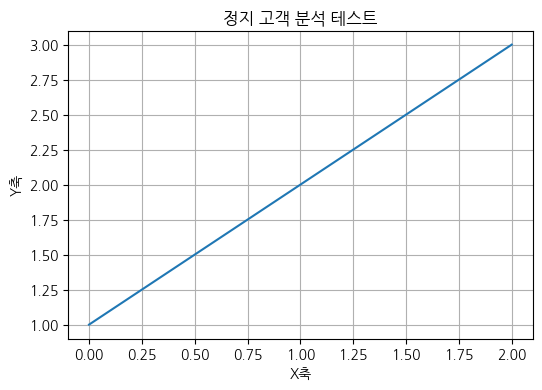

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot([1, 2, 3])
plt.title("정지 고객 분석 테스트")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.grid(True)
plt.show()

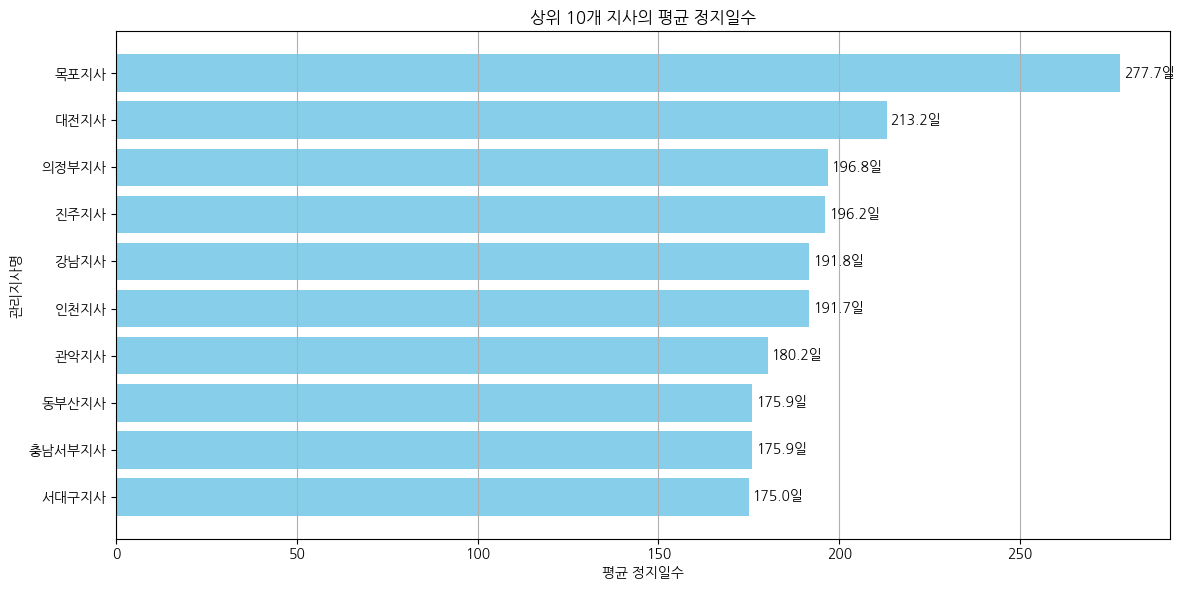

In [ ]:
# ✅ 한글 컬럼 정리
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')

# ✅ 그룹 통계 요약 (관리본부명, 관리지사명 기준)
summary = df.groupby(['관리본부명', '관리지사명']).agg({
    '계약번호': 'nunique',
    '정지일수': 'mean',
    'KTT월정료': 'mean'
}).reset_index().rename(columns={
    '계약번호': '계약건수',
    '정지일수': '평균 정지일수',
    'KTT월정료': '평균 월정료'
})

# ✅ 상위 10개 지사 시각화
top10 = summary.sort_values(by='평균 정지일수', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top10['관리지사명'], top10['평균 정지일수'], color='skyblue')
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.1f}일', va='center', fontsize=10)
plt.xlabel('평균 정지일수')
plt.ylabel('관리지사명')
plt.title('상위 10개 지사의 평균 정지일수')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

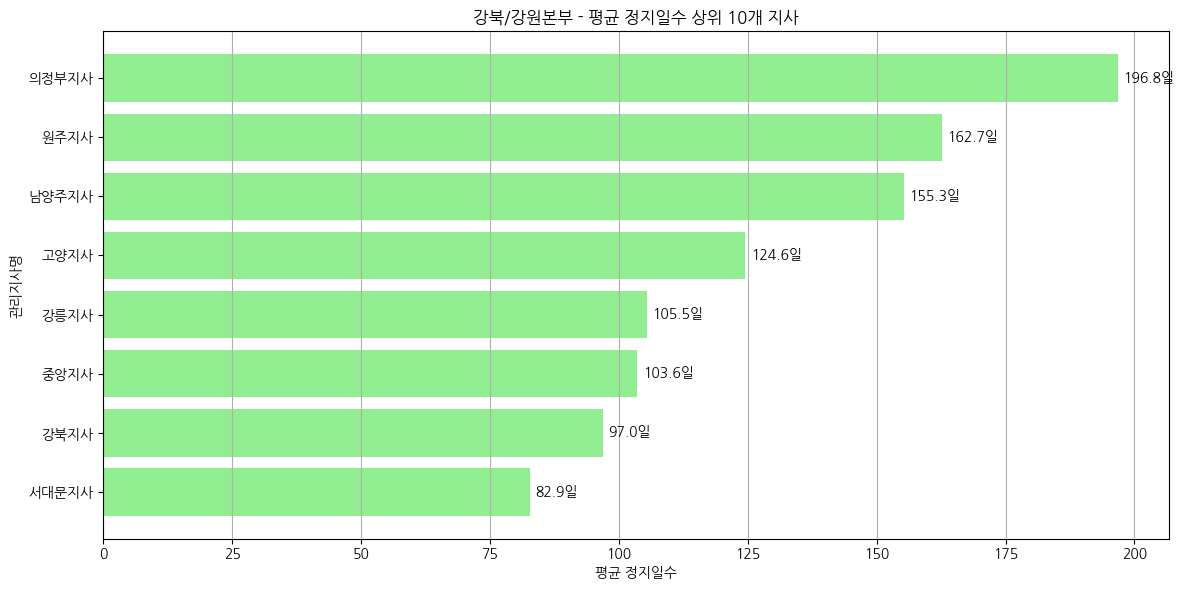

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 파일 경로
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ CSV 불러오기
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')

# ✅ 강북/강원본부만 필터링
filtered_df = df[df['관리본부명'] == '강북/강원본부']

# ✅ 지사별 요약 통계
summary = filtered_df.groupby('관리지사명').agg({
    '계약번호': 'nunique',
    '정지일수': 'mean',
    'KTT월정료': 'mean'
}).reset_index().rename(columns={
    '계약번호': '계약건수',
    '정지일수': '평균 정지일수',
    'KTT월정료': '평균 월정료'
})

# ✅ 상위 10개 지사 시각화
top10 = summary.sort_values(by='평균 정지일수', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bars = plt.barh(top10['관리지사명'], top10['평균 정지일수'], color='lightgreen')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}일', va='center', fontsize=10)
plt.xlabel('평균 정지일수')
plt.ylabel('관리지사명')
plt.title('강북/강원본부 - 평균 정지일수 상위 10개 지사')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
import os

# ✅ Google Drive 마운트
drive.mount('/content/drive')

# ✅ 파일 경로
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 파일 존재 여부 확인
if os.path.exists(file_path):
    print("✅ 파일 존재 확인:", file_path)
else:
    print("❌ 파일이 존재하지 않습니다. 정확한 경로를 확인해주세요.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 파일 존재 확인: /content/drive/MyDrive/시설/정지/정지0507.csv


In [ ]:
import os

# ✅ 폴더 내 파일 목록 확인
folder_path = '/content/drive/MyDrive/시설/정지'
file_list = os.listdir(folder_path)

# ✅ 목록 출력
print("해당 폴더 내 파일 목록:")
for file in file_list:
    print(file)

해당 폴더 내 파일 목록:
C150_G0000_00013.csv
2025년0422_전사 정지조건리스트_완성.xlsx
2025년0422_전사 정지조건리스트_완성.csv
정지처리분석_2504222.csv
C155_03104_00045.csv
본사정지모음_2024년.csv
정지0507.csv
정지0507_구간별요약.xlsx


In [ ]:
df.columns = df.columns.str.strip()
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

top20_filtered = df[
    (df['관리본부명'] == '강북/강원본부') &
    (~df['L/i(BM)'].astype(str).str.contains('KT단독상품', na=False))
].sort_values(by='정지일수', ascending=False).head(20)

from IPython.display import display
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

display(top20_filtered[['관리지사명', 'L/i(BM)', '서비스(소)','영업자명','상호', '계약번호', 'KTT월정료', '정지일수', '정지시작일자', '정지희망종료일']])

,관리지사명,L/i(BM),서비스(소),영업자명,상호,계약번호,KTT월정료,정지일수,정지시작일자,정지희망종료일
5394,중앙지사,i형,GiGAeyes i-slim,추천자와동일,이원심,51586758,17000,564,2023-11-15,2025-05-31
5318,남양주지사,i형,GiGAeyes i-slim,추천자와동일,손민재,51368678,17000,494,2024-01-24,2025-05-31
1929,남양주지사,i형,GiGAeyes i-slim,추천자와동일,달빛과일 갈매점,51495821,17000,464,2024-02-23,2025-05-31
5317,남양주지사,i형,GiGAeyes i-slim,추천자와동일,배종호,51366702,17000,402,2024-04-25,2025-05-31
5518,중앙지사,L형,kt OCT 뷰(NVR),권대호,리틀콜리,51865050,35000,366,2024-04-11,2025-04-11
5359,남양주지사,i형,GiGAeyes i-slim,추천자와동일,정종을,51490021,27000,366,2024-05-31,2025-05-31
5198,원주지사,L형,kt OCT 뷰(DVR),정광희,대왕당구클럽,50813592,50000,366,2024-09-12,2025-09-12
5156,원주지사,L형,kt OCT 뷰(NVR),노시찬,현대농자재(둔내),50420045,90000,366,2024-09-12,2025-09-12
5507,중앙지사,i형,GiGAeyes i-slim,고객센터9(홈가드),조석동,51841244,37000,353,2024-06-13,2025-05-31
5541,고양지사,i형,GiGAeyes i-slim (ktt)(2210),추천자와동일,홍지혜,51950105,17000,341,2024-06-25,2025-05-31


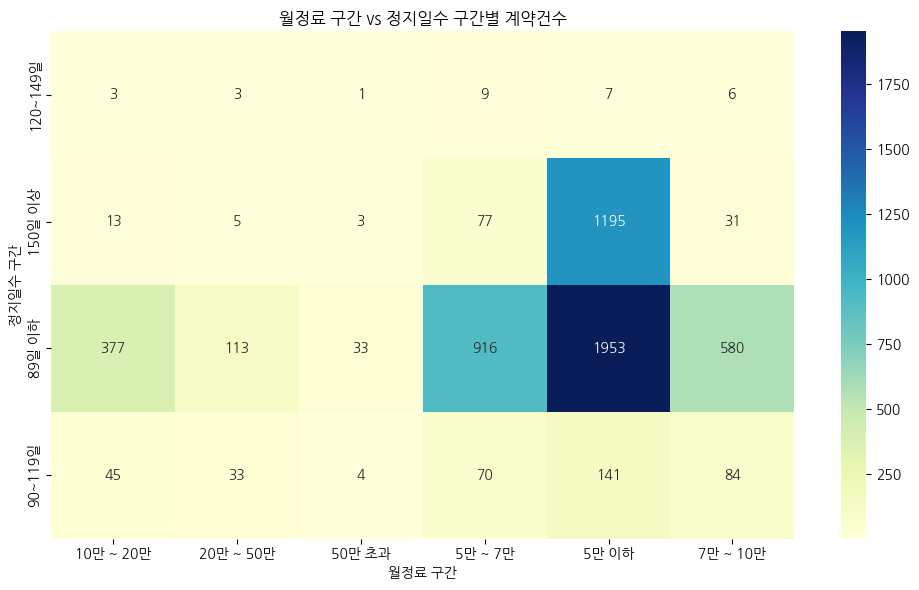

,관리지사명,월정료 구간,정지일수 구간,계약건수,총 월정료
0,강남지사,10만 ~ 20만,120~149일,1,159000
1,강남지사,10만 ~ 20만,89일 이하,8,1176000
2,강남지사,10만 ~ 20만,90~119일,2,254000
3,강남지사,20만 ~ 50만,89일 이하,1,390000
4,강남지사,5만 ~ 7만,150일 이상,3,185000
...,...,...,...,...,...
480,포항지사,5만 ~ 7만,90~119일,2,135000
481,포항지사,5만 이하,150일 이상,29,782750
482,포항지사,5만 이하,89일 이하,76,2569600
483,포항지사,5만 이하,90~119일,5,174000


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1. 폴더 내 0507 파일 자동 탐색
folder_path = '/content/drive/MyDrive/시설/정지'
file_path = ''
for file in os.listdir(folder_path):
    if '0507' in file and file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        break

# ✅ 2. 파일 로드 및 기본 정리
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 3. 구간 정리
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)

df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만 ~ 7만' if x <= 70000 else
              '7만 ~ 10만' if x <= 100000 else
              '10만 ~ 20만' if x <= 200000 else
              '20만 ~ 50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 4. 지사별, 구간별 요약
grouped = df.groupby(['관리지사명', '월정료 구간', '정지일수 구간']).agg({
    '계약번호': 'nunique',
    'KTT월정료': 'sum'
}).reset_index().rename(columns={
    '계약번호': '계약건수',
    'KTT월정료': '총 월정료'
})

# ✅ 5. 히트맵 시각화 (건수 기준)
pivot_table = grouped.pivot_table(index='정지일수 구간', columns='월정료 구간', values='계약건수', aggfunc='sum', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('월정료 구간 vs 정지일수 구간별 계약건수')
plt.xlabel('월정료 구간')
plt.ylabel('정지일수 구간')
plt.tight_layout()
plt.show()

# ✅ 6. 결과 요약 테이블 보기
from IPython.display import display
display(grouped)

<ipython-input-23-00b9792a5a02>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(grouped, x='계약건수', y='정지일수 구간', inner='stick', palette='Dark2')


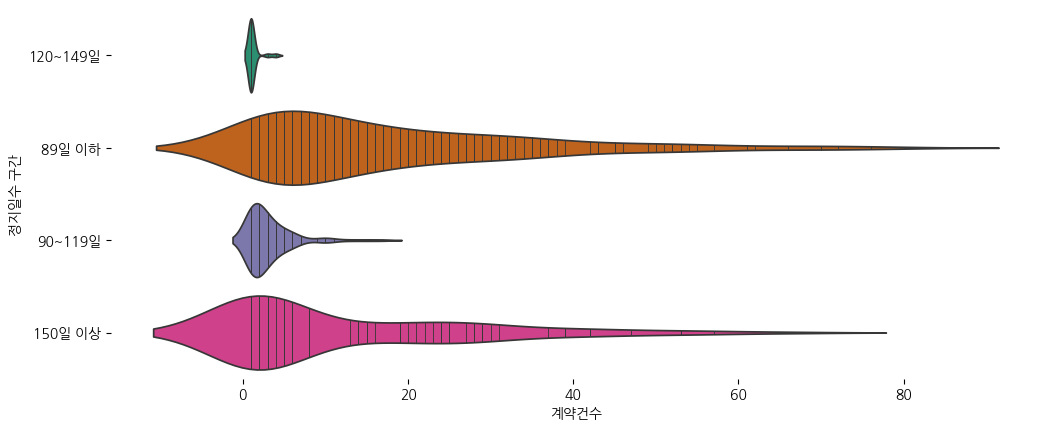

In [ ]:
# @title 정지일수 구간 vs 계약건수

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(grouped['정지일수 구간'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped, x='계약건수', y='정지일수 구간', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# ✅ 1. 폴더 내 0507 파일 자동 탐색
folder_path = '/content/drive/MyDrive/시설/정지'
file_path = ''
for file in os.listdir(folder_path):
    if '0507' in file and file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        break

# ✅ 2. 파일 로드 및 정리
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 3. 구간 정의
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)

df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만 ~ 7만' if x <= 70000 else
              '7만 ~ 10만' if x <= 100000 else
              '10만 ~ 20만' if x <= 200000 else
              '20만 ~ 50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 4. 그룹 요약 + 내림차순 정렬
grouped = df.groupby(['관리지사명', '월정료 구간', '정지일수 구간']).agg(
    계약건수=('계약번호', 'nunique'),
    총월정료=('KTT월정료', 'sum')
).reset_index()

grouped_sorted = grouped.sort_values(by='계약건수', ascending=False).reset_index(drop=True)

# ✅ 5. 테이블 출력
display(grouped_sorted)

,관리지사명,월정료 구간,정지일수 구간,계약건수,총월정료
0,구미지사,5만 이하,89일 이하,80,2809697
1,포항지사,5만 이하,89일 이하,76,2569600
2,전주지사,5만 이하,89일 이하,72,2579226
3,제주지사,5만 이하,89일 이하,70,2537500
4,원주지사,5만 이하,89일 이하,70,2665500
...,...,...,...,...,...
480,충남서부지사,7만 ~ 10만,150일 이상,1,72000
481,강북지사,10만 ~ 20만,90~119일,1,120000
482,충남서부지사,20만 ~ 50만,89일 이하,1,455800
483,강남지사,20만 ~ 50만,89일 이하,1,390000


<ipython-input-43-8563d1cb5b5f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(grouped_sorted, x='계약건수', y='월정료 구간', inner='stick', palette='Dark2')


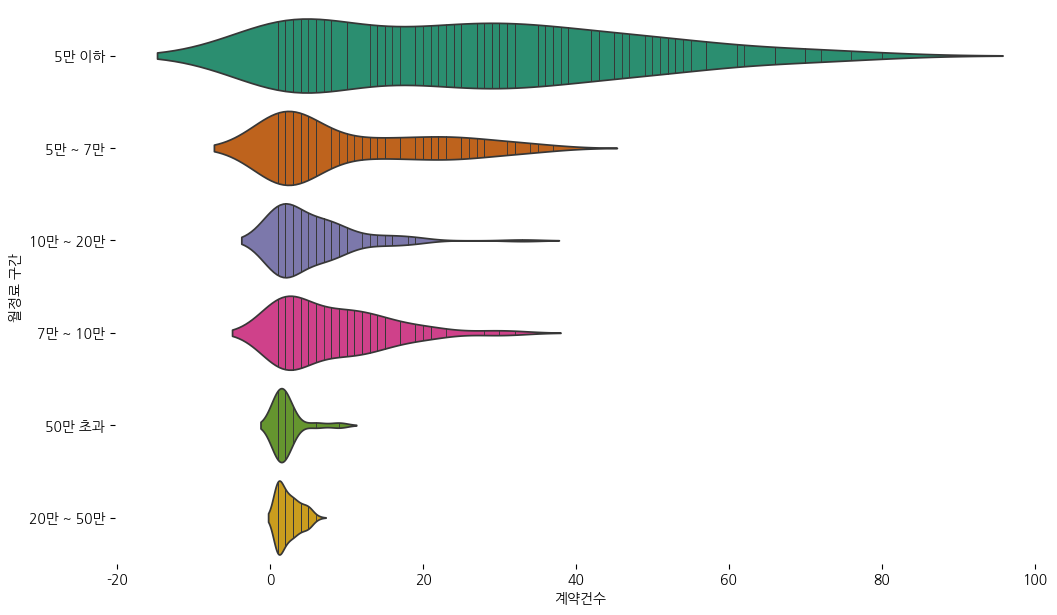

In [ ]:
# @title 월정료 구간 vs 계약건수

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(grouped_sorted['월정료 구간'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(grouped_sorted, x='계약건수', y='월정료 구간', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

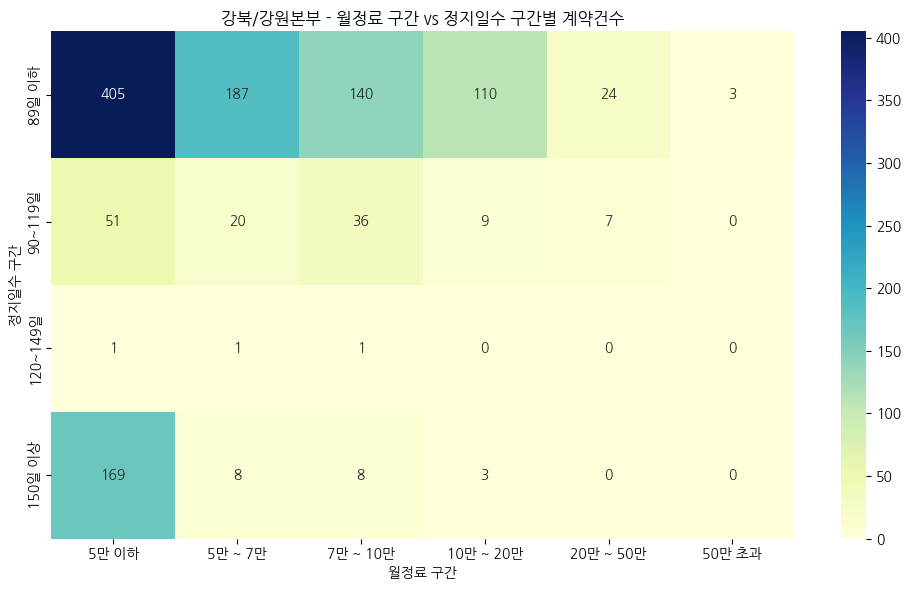

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# ✅ 파일 자동 탐색
folder_path = '/content/drive/MyDrive/시설/정지'
for file in os.listdir(folder_path):
    if '0507' in file and file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        break

# ✅ 데이터 불러오기 및 정제
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 구간 정리
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)

df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만 ~ 7만' if x <= 70000 else
              '7만 ~ 10만' if x <= 100000 else
              '10만 ~ 20만' if x <= 200000 else
              '20만 ~ 50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 강북/강원본부만 필터링
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부']

# ✅ 그룹화 및 피벗
grouped_filtered = df_filtered.groupby(['관리지사명', '월정료 구간', '정지일수 구간']).agg(
    계약건수=('계약번호', 'nunique'),
    총월정료=('KTT월정료', 'sum')
).reset_index()

pivot_filtered = grouped_filtered.pivot_table(
    index='정지일수 구간', columns='월정료 구간', values='계약건수', aggfunc='sum', fill_value=0
).reindex(index=['89일 이하', '90~119일', '120~149일', '150일 이상'],
          columns=['5만 이하', '5만 ~ 7만', '7만 ~ 10만', '10만 ~ 20만', '20만 ~ 50만', '50만 초과'])

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_filtered, annot=True, fmt='d', cmap='YlGnBu')
plt.title('강북/강원본부 - 월정료 구간 vs 정지일수 구간별 계약건수')
plt.xlabel('월정료 구간')
plt.ylabel('정지일수 구간')
plt.tight_layout()
plt.show()

In [ ]:
# ✅ Colab 환경에서 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# ✅ 필요한 패키지 불러오기
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 파일 자동 탐색
folder_path = '/content/drive/MyDrive/시설/정지'
file_path = ''
for file in os.listdir(folder_path):
    if '0507' in file and file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        break

# ✅ 데이터 불러오기 및 정리
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 구간 생성
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)
df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만 ~ 7만' if x <= 70000 else
              '7만 ~ 10만' if x <= 100000 else
              '10만 ~ 20만' if x <= 200000 else
              '20만 ~ 50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 강북/강원본부 필터링
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# 최상위 경로 탐색
base_path = "/content/drive/MyDrive"
for root, dirs, files in os.walk(base_path):
    print(f"[📁] {root}")
    for name in files:
        print(f"    └── {name}")
    break  # 최상위 한 번만 출력


[📁] /content/drive/MyDrive
    └── phb.gmap
    └── 2020년 캘린더.gsheet
    └── 5월 고객관리.gsheet
    └── 주분석 스프레드시트.gsheet
    └── KPI24 대시보드 활용 사례_B2C마케팅.gsheet
    └── 에스디큐브 1년치 최근순으로 주가현황 한국거래소 기준으로 보여주세요.gsheet
    └── tmdb_5000_credits.csv
    └── tmdb_5000_movies.csv
    └── 강릉지사점검.gmap
    └── 강릉점검.gmap
    └── 강릉지사점검.gsheet
    └── 체납_회수_계획_프레젠테이션.pptx
    └── BIZGIS_X-RayMap_Viewer_Report.pptx
    └── voc접수대비 해지시설 해지사유분석db.csv
    └── 7월 프로모션 설명회.pptx
    └── 고지점령 소통미팅_20240712(최종).pdf
    └── 2024년 이러닝 8월 교육 과정 목록 및 신청서(2).xlsx
    └── 1 2024년 6월 기관별 일시정지 현황.xlsx
    └── 경쟁사 게릴라 영업 대응 표준 프로세스 수립(안)_240624(3).pptx
    └── Gen-2%201828370272%2C%20Slow-motion%20shot%20of%20%2C%20korean-baseball-team%2C%20M%205 (2).mp4
    └── Gen-2%201828370272%2C%2

In [ ]:
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'


In [ ]:
# ✅ 강북/강원본부 필터링 다시 적용
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부']


,관리지사명,월정료 구간,정지일수 구간,계약건수,총 월정료
6,강릉지사,5만 이하,89일 이하,43,1484800
4,강릉지사,5만 ~ 7만,89일 이하,17,1006946
8,강릉지사,7만 ~ 10만,89일 이하,13,1106410
0,강릉지사,10만 ~ 20만,89일 이하,8,1071000
2,강릉지사,20만 ~ 50만,89일 이하,1,208000
...,...,...,...,...,...
87,중앙지사,10만 ~ 20만,90~119일,1,160000
93,중앙지사,5만 이하,150일 이상,19,518000
90,중앙지사,5만 ~ 7만,150일 이상,1,57500
96,중앙지사,7만 ~ 10만,150일 이상,3,273000


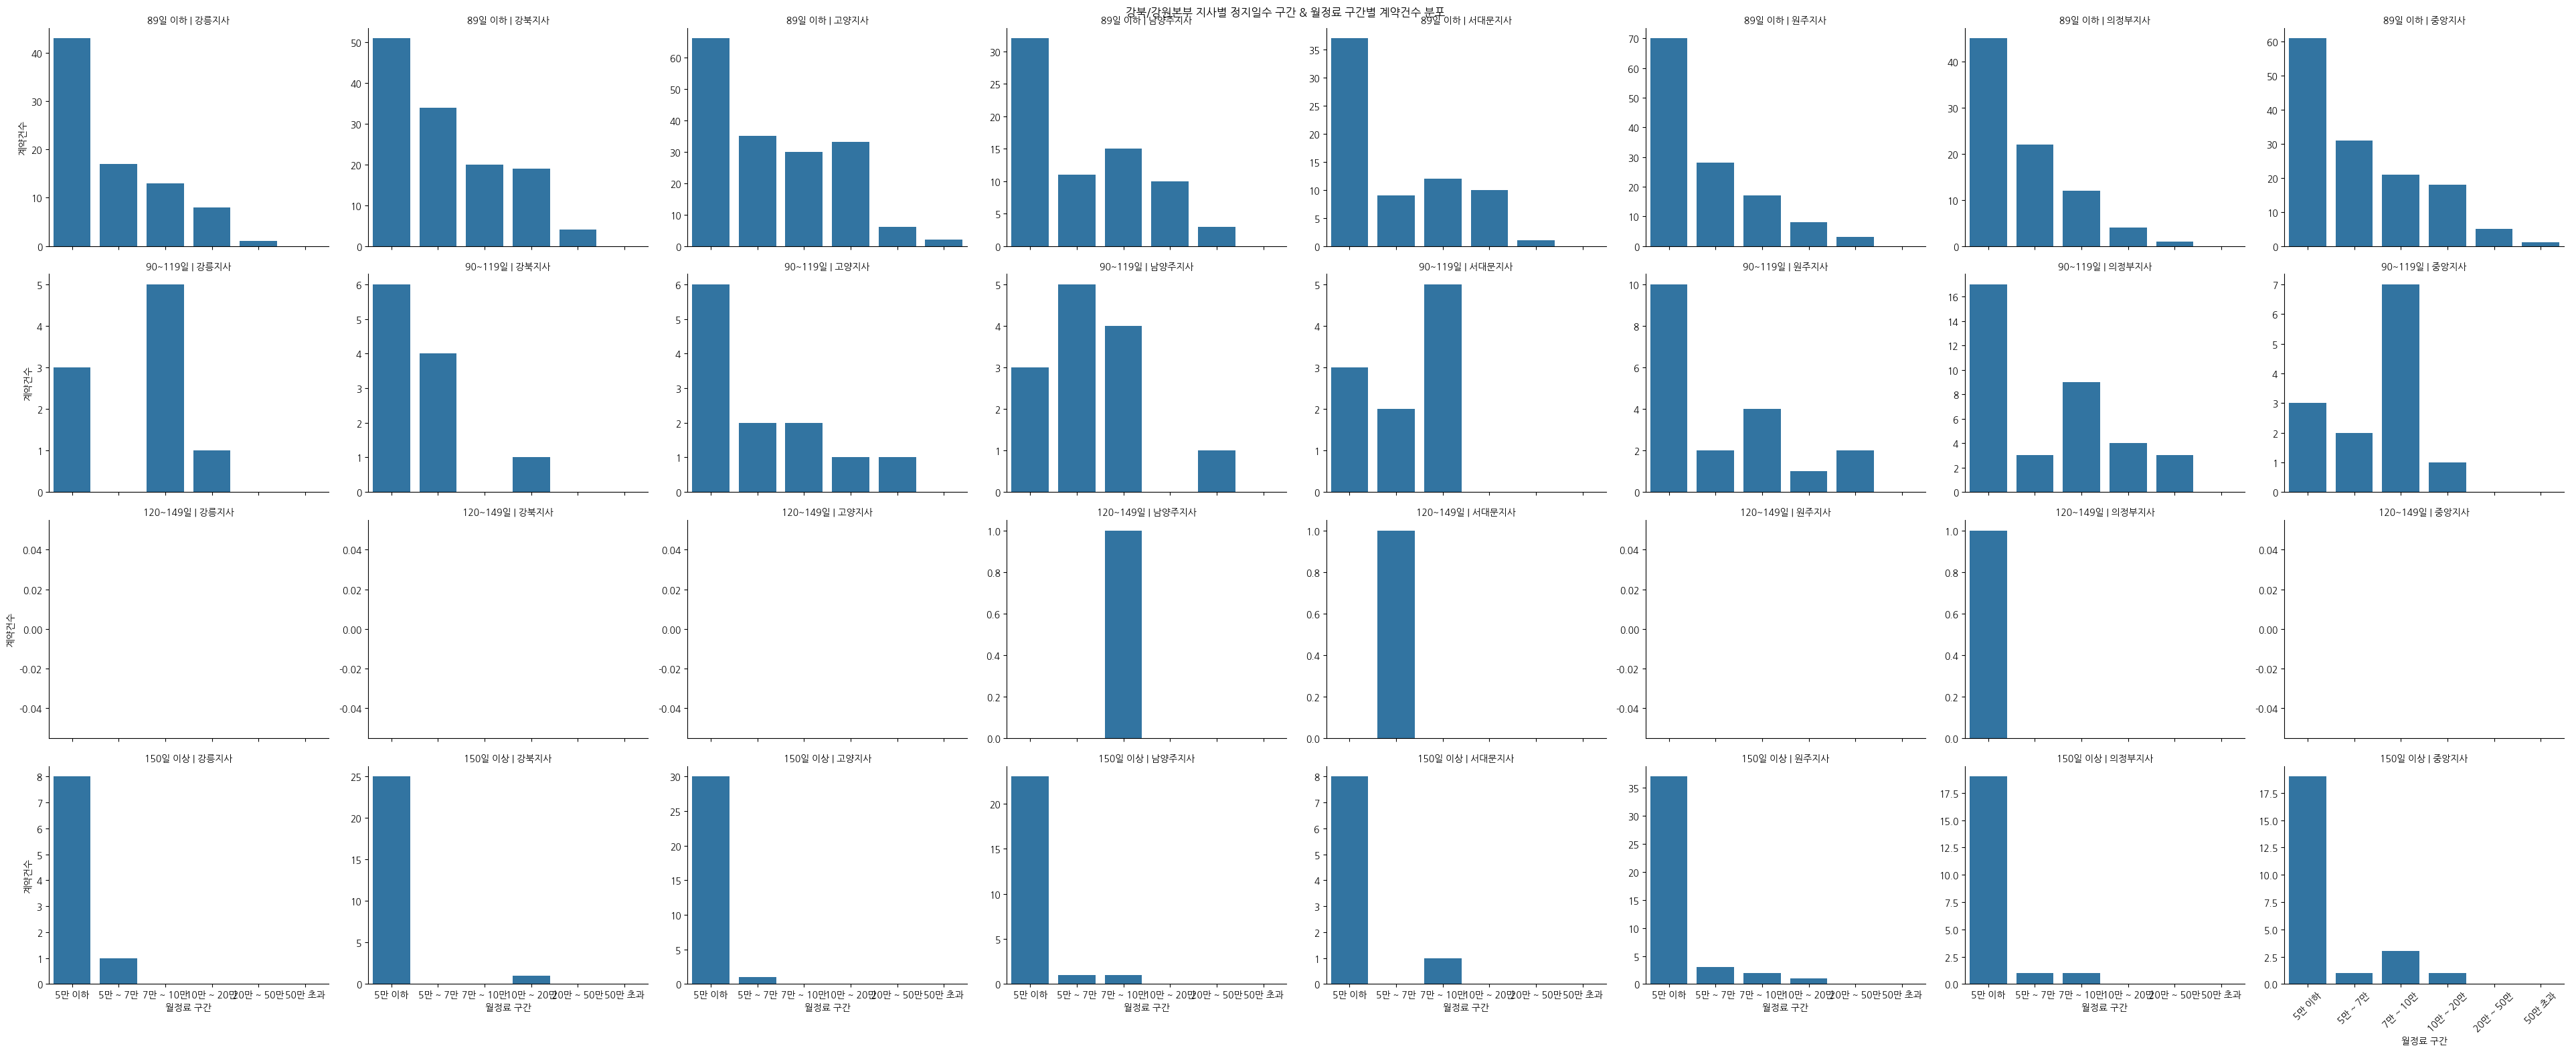

In [ ]:
# ✅ 강북/강원본부 필터링 다시 정의
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부']

# ✅ 분석 및 시각화 코드 재실행
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 지사별, 월정료 구간, 정지일수 구간별 요약 (강북/강원본부)
grouped_filtered = df_filtered.groupby(['관리지사명', '월정료 구간', '정지일수 구간']).agg({
    '계약번호': 'nunique',
    'KTT월정료': 'sum'
}).reset_index().rename(columns={
    '계약번호': '계약건수',
    'KTT월정료': '총 월정료'
})

# ✅ 월정료 기준 정렬을 위한 순서 지정
월정료_순서 = ['5만 이하', '5만 ~ 7만', '7만 ~ 10만', '10만 ~ 20만', '20만 ~ 50만', '50만 초과']
정지일수_순서 = ['89일 이하', '90~119일', '120~149일', '150일 이상']
grouped_filtered['월정료 구간'] = pd.Categorical(grouped_filtered['월정료 구간'], categories=월정료_순서, ordered=True)
grouped_filtered['정지일수 구간'] = pd.Categorical(grouped_filtered['정지일수 구간'], categories=정지일수_순서, ordered=True)

# ✅ 지사별 시각화
g = sns.catplot(
    data=grouped_filtered,
    x='월정료 구간',
    y='계약건수',
    col='관리지사명',
    row='정지일수 구간',
    kind='bar',
    height=4,
    aspect=1.2,
    sharey=False
)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set_axis_labels("월정료 구간", "계약건수")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('강북/강원본부 지사별 정지일수 구간 & 월정료 구간별 계약건수 분포')
plt.xticks(rotation=45)
plt.tight_layout()

# ✅ 결과 테이블도 보기 좋게 출력
from IPython.display import display
display(grouped_filtered.sort_values(by=['관리지사명', '정지일수 구간', '월정료 구간']))


In [ ]:
# 드라이브 마운트 및 데이터 불러오기
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

folder_path = '/content/drive/MyDrive/시설/정지'
for f in os.listdir(folder_path):
    print(repr(f))  # 파일명 안의 숨은 문자 포함 출력


'C150_G0000_00013.csv'
'2025년0422_전사 정지조건리스트_완성.xlsx'
'2025년0422_전사 정지조건리스트_완성.csv'
'정지처리분석_2504222.csv'
'C155_03104_00045.csv'
'본사정지모음_2024년.csv'
'정지0507.csv'


✅ 파일 찾음: /content/drive/MyDrive/시설/정지/정지0507.csv


ValueError: Unknown format code 'd' for object of type 'float'

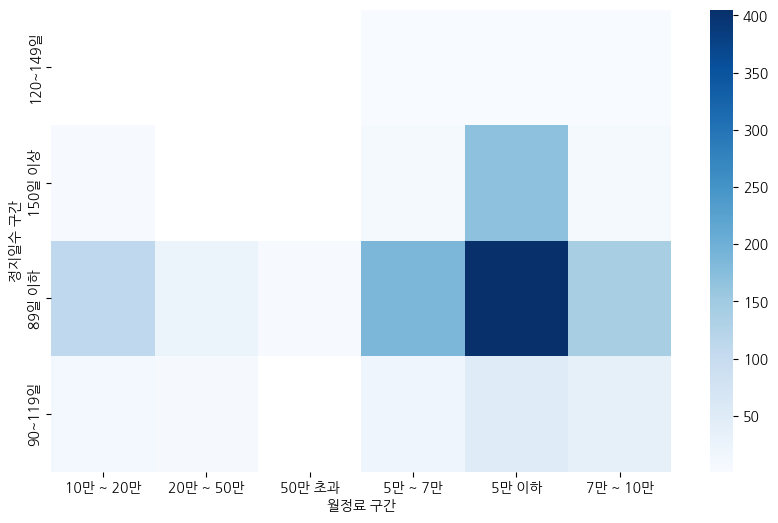

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 드라이브 내 폴더 경로
folder_path = '/content/drive/MyDrive/시설/정지'

# ✅ 자동 파일 탐색 (0507 포함된 csv 찾기)
for file in os.listdir(folder_path):
    if '0507' in file and file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        print(f"✅ 파일 찾음: {file_path}")
        break
else:
    raise FileNotFoundError("❌ '0507'이 포함된 CSV 파일을 찾을 수 없습니다.")

# ✅ 데이터 불러오기 및 정리
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 구간 생성
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)
df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만 ~ 7만' if x <= 70000 else
              '7만 ~ 10만' if x <= 100000 else
              '10만 ~ 20만' if x <= 200000 else
              '20만 ~ 50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 강북/강원본부 필터링
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부']

# ✅ 요약 테이블
grouped = df_filtered.groupby(['정지일수 구간', '월정료 구간']).agg(
    계약건수=('계약번호', 'nunique'),
    총월정료=('KTT월정료', 'sum')
).reset_index()

# ✅ 히트맵
pivot1 = grouped.pivot(index='정지일수 구간', columns='월정료 구간', values='계약건수')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot1, annot=True, fmt='d', cmap='Blues')
plt.title('강북/강원본부 - 정지일수 vs 월정료 구간별 계약건수')
plt.xlabel('월정료 구간')
plt.ylabel('정지일수 구간')
plt.tight_layout()
plt.show()

# ✅ 바 차트
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='월정료 구간', y='총월정료', hue='정지일수 구간')
plt.title('강북/강원본부 - 월정료 구간별 총 월정료 (정지일수 구간별)')
plt.ylabel('총 월정료 (원)')
plt.xlabel('월정료 구간')
plt.xticks(rotation=45)
plt.legend(title='정지일수 구간')
plt.tight_layout()
plt.show()


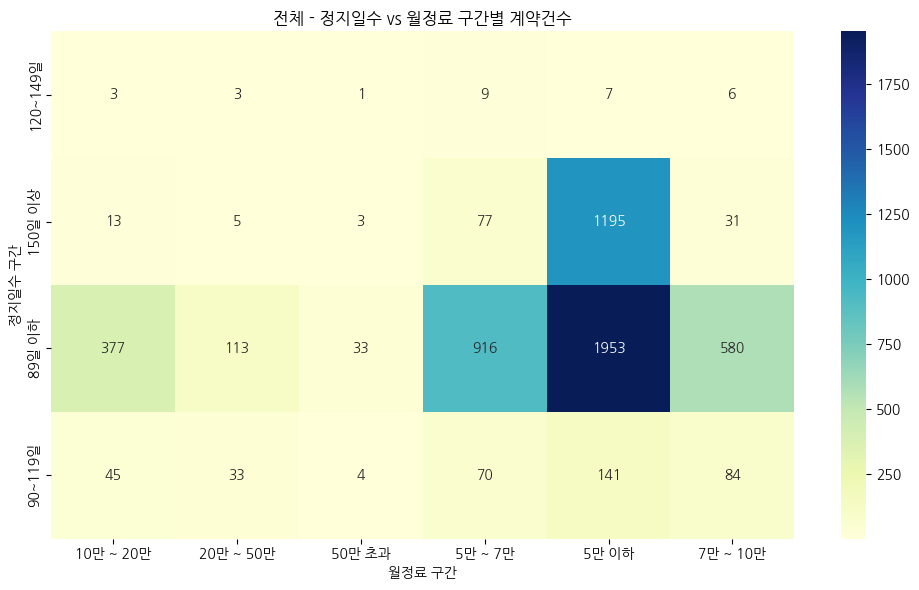

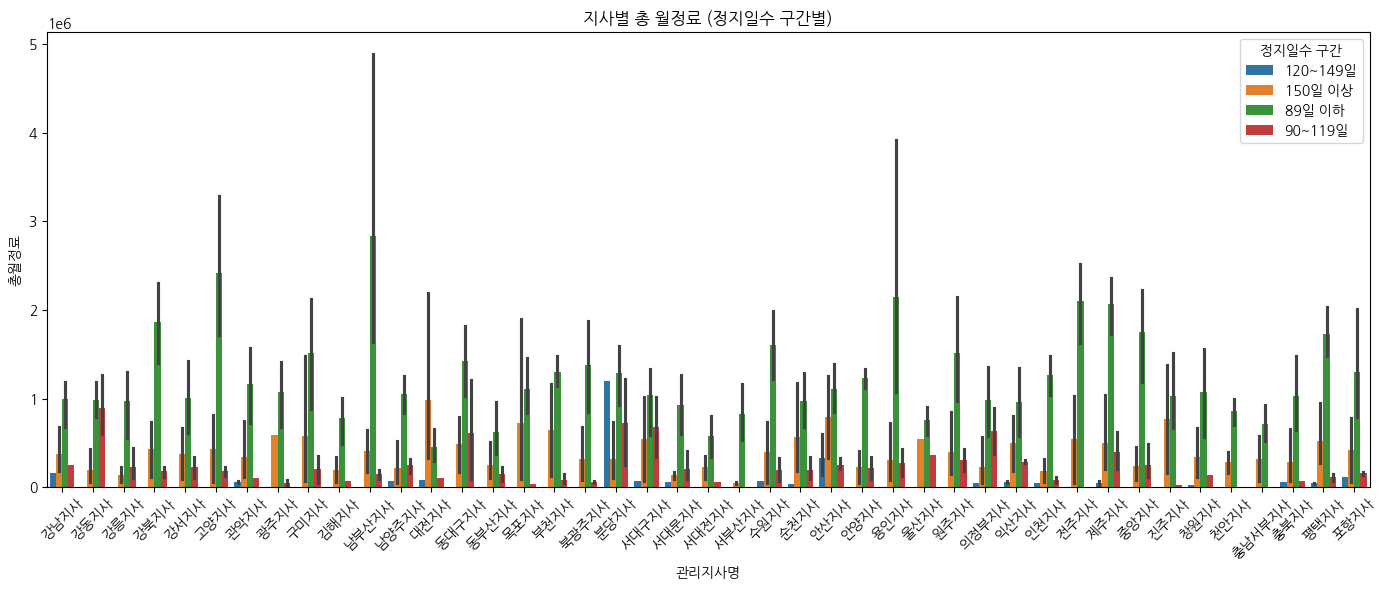

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 드라이브 내 폴더 경로
folder_path = '/content/drive/MyDrive/시설/정지'

# ✅ 자동 파일 탐색 (0507 포함된 csv 찾기)
file_path = ''
for file in os.listdir(folder_path):
    if '0507' in file and file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        break

# ✅ 데이터 불러오기 및 정리
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 구간 생성
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)
df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만 ~ 7만' if x <= 70000 else
              '7만 ~ 10만' if x <= 100000 else
              '10만 ~ 20만' if x <= 200000 else
              '20만 ~ 50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 지사별 구간 분석
grouped = df.groupby(['관리지사명', '정지일수 구간', '월정료 구간']).agg(
    계약건수=('계약번호', 'nunique'),
    총월정료=('KTT월정료', 'sum')
).reset_index()

# ✅ 히트맵 예시 (전체)
pivot = grouped.pivot_table(index='정지일수 구간', columns='월정료 구간', values='계약건수', aggfunc='sum', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('전체 - 정지일수 vs 월정료 구간별 계약건수')
plt.xlabel('월정료 구간')
plt.ylabel('정지일수 구간')
plt.tight_layout()
plt.show()

# ✅ 바차트 예시 (지사별 총 월정료)
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='관리지사명', y='총월정료', hue='정지일수 구간')
plt.title('지사별 총 월정료 (정지일수 구간별)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# ✅ 기본 데이터프레임 준비 (file_path는 해당 파일로 설정되었다고 가정)
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 구간 컬럼 생성
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)
df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만 ~ 7만' if x <= 70000 else
              '7만 ~ 10만' if x <= 100000 else
              '10만 ~ 20만' if x <= 200000 else
              '20만 ~ 50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 강북/강원본부 데이터 필터링
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부']


In [ ]:
import os

folder_path = '/content/drive/MyDrive/시설/정지'
for file in os.listdir(folder_path):
    print(file)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/시설/정지'

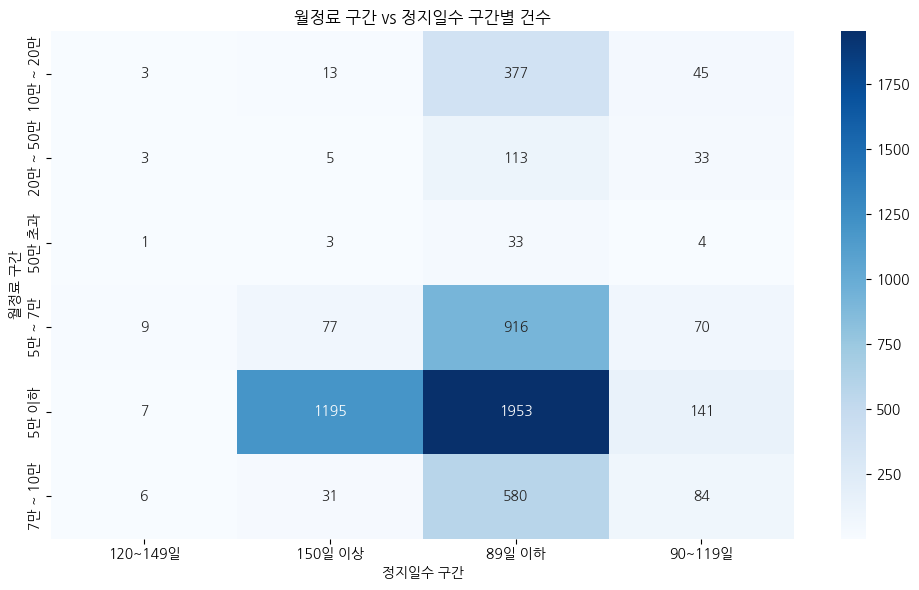

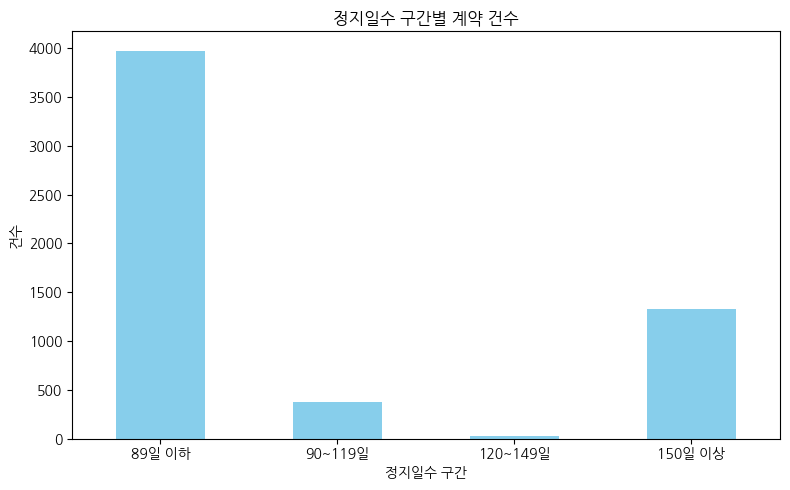

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 파일 경로
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 데이터 로드
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 구간 설정
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)

df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만 ~ 7만' if x <= 70000 else
              '7만 ~ 10만' if x <= 100000 else
              '10만 ~ 20만' if x <= 200000 else
              '20만 ~ 50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 월정료 구간별 정지일수 구간별 건수 집계
summary = df.groupby(['월정료 구간', '정지일수 구간']).size().unstack(fill_value=0)

# ✅ 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(summary, annot=True, fmt='d', cmap='Blues')
plt.title('월정료 구간 vs 정지일수 구간별 건수')
plt.ylabel('월정료 구간')
plt.xlabel('정지일수 구간')
plt.tight_layout()
plt.show()

# ✅ 바 차트 - 정지일수 구간별 총 건수
plt.figure(figsize=(8, 5))
df['정지일수 구간'].value_counts().loc[['89일 이하', '90~119일', '120~149일', '150일 이상']].plot(kind='bar', color='skyblue')
plt.title('정지일수 구간별 계약 건수')
plt.xlabel('정지일수 구간')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
from IPython.display import display

# ✅ 결과 요약 테이블 보기
display(summary)


정지일수 구간,120~149일,150일 이상,89일 이하,90~119일
월정료 구간,,,,
10만 ~ 20만,3,13,377,45
20만 ~ 50만,3,5,113,33
50만 초과,1,3,33,4
5만 ~ 7만,9,77,916,70
5만 이하,7,1195,1953,141
7만 ~ 10만,6,31,580,84


In [ ]:
summary.to_excel('/content/drive/MyDrive/시설/정지/정지0507_구간별요약.xlsx', index=True)
print("📁 엑셀 파일로 저장 완료: 정지0507_구간별요약.xlsx")


📁 엑셀 파일로 저장 완료: 정지0507_구간별요약.xlsx


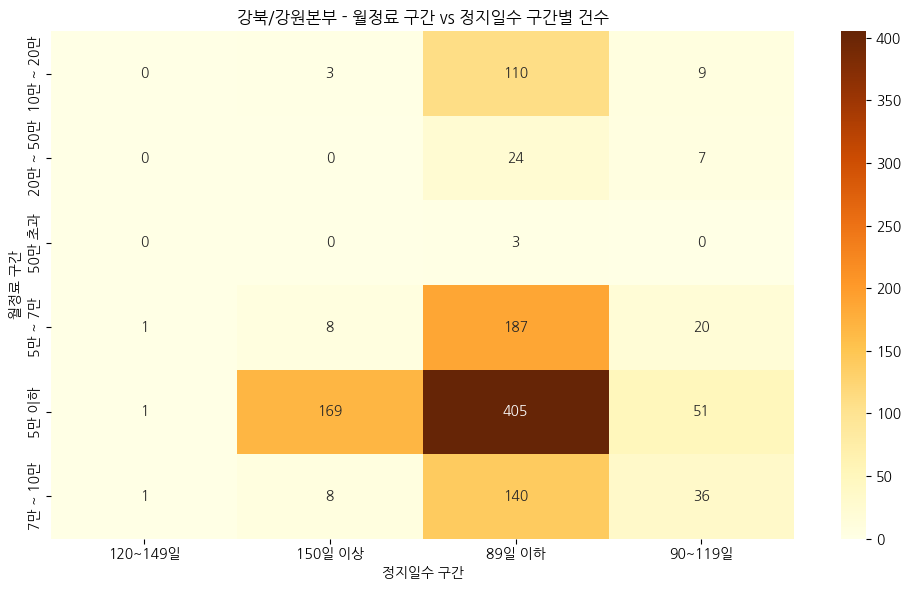

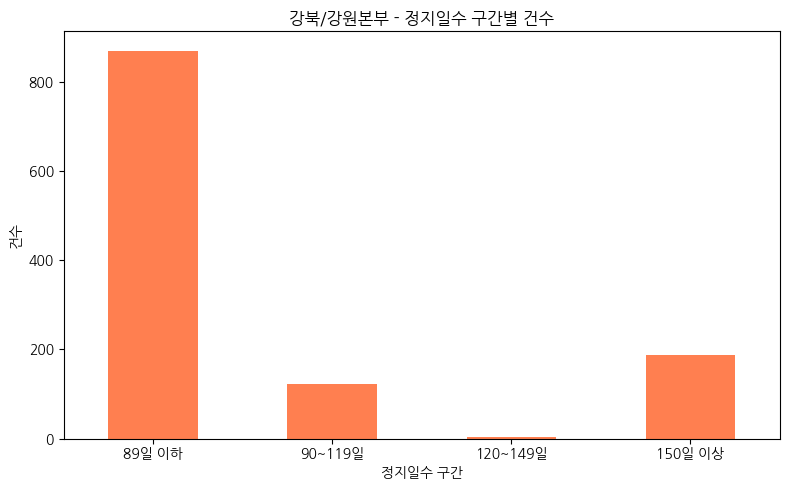

In [ ]:
# ✅ '강북/강원본부' 필터링
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부']

# ✅ 구간별 건수 요약
summary_filtered = df_filtered.groupby(['월정료 구간', '정지일수 구간']).size().unstack(fill_value=0)

# ✅ 히트맵 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(summary_filtered, annot=True, fmt='d', cmap='YlOrBr')
plt.title('강북/강원본부 - 월정료 구간 vs 정지일수 구간별 건수')
plt.ylabel('월정료 구간')
plt.xlabel('정지일수 구간')
plt.tight_layout()
plt.show()

# ✅ 바 차트 (정지일수 구간별 건수)
plt.figure(figsize=(8, 5))
df_filtered['정지일수 구간'].value_counts().loc[['89일 이하', '90~119일', '120~149일', '150일 이상']].plot(
    kind='bar', color='coral')
plt.title('강북/강원본부 - 정지일수 구간별 건수')
plt.xlabel('정지일수 구간')
plt.ylabel('건수')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


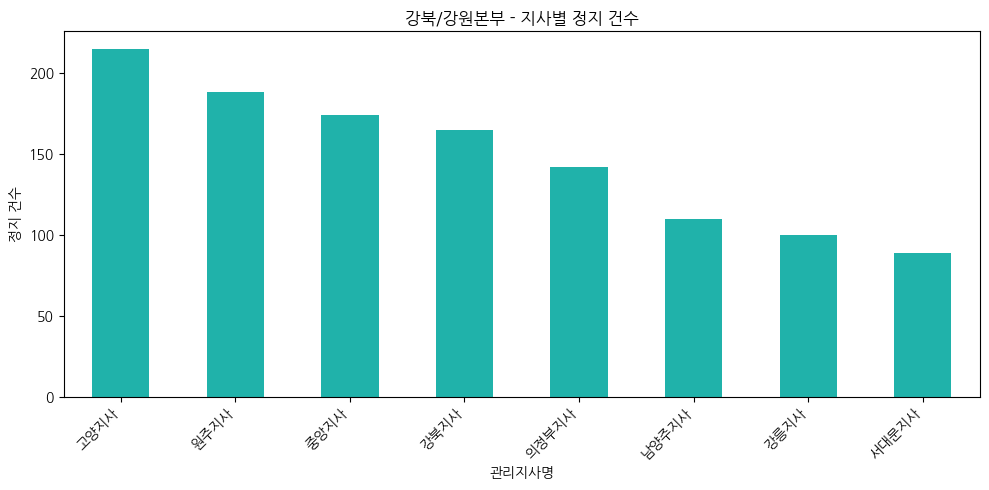

In [ ]:
plt.figure(figsize=(10, 5))
df_filtered['관리지사명'].value_counts().plot(kind='bar', color='lightseagreen')
plt.title('강북/강원본부 - 지사별 정지 건수')
plt.xlabel('관리지사명')
plt.ylabel('정지 건수')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


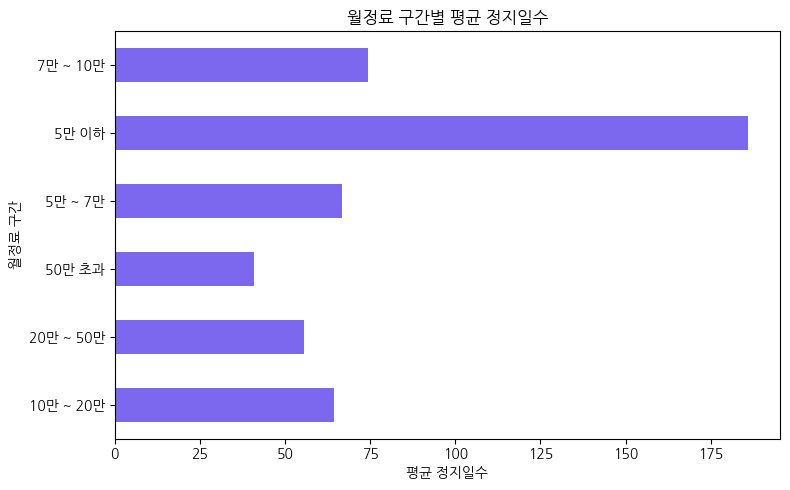

In [ ]:
avg_days = df_filtered.groupby('월정료 구간')['정지일수'].mean().sort_index()

plt.figure(figsize=(8, 5))
avg_days.plot(kind='barh', color='mediumslateblue')
plt.title('월정료 구간별 평균 정지일수')
plt.xlabel('평균 정지일수')
plt.ylabel('월정료 구간')
plt.tight_layout()
plt.show()


<ipython-input-66-f1b1a944c6d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['정지시작일자'] = pd.to_datetime(df_filtered['정지시작일자'], errors='coerce')
<ipython-input-66-f1b1a944c6d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['정지시작_월'] = df_filtered['정지시작일자'].dt.to_period('M')


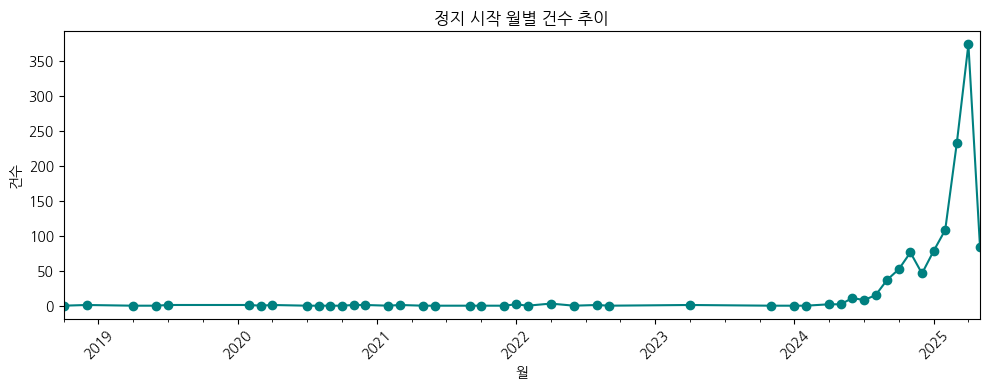

In [ ]:
df_filtered['정지시작일자'] = pd.to_datetime(df_filtered['정지시작일자'], errors='coerce')
df_filtered['정지시작_월'] = df_filtered['정지시작일자'].dt.to_period('M')

monthly = df_filtered.groupby('정지시작_월').size()

plt.figure(figsize=(10, 4))
monthly.plot(marker='o', linestyle='-', color='teal')
plt.title('정지 시작 월별 건수 추이')
plt.xlabel('월')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


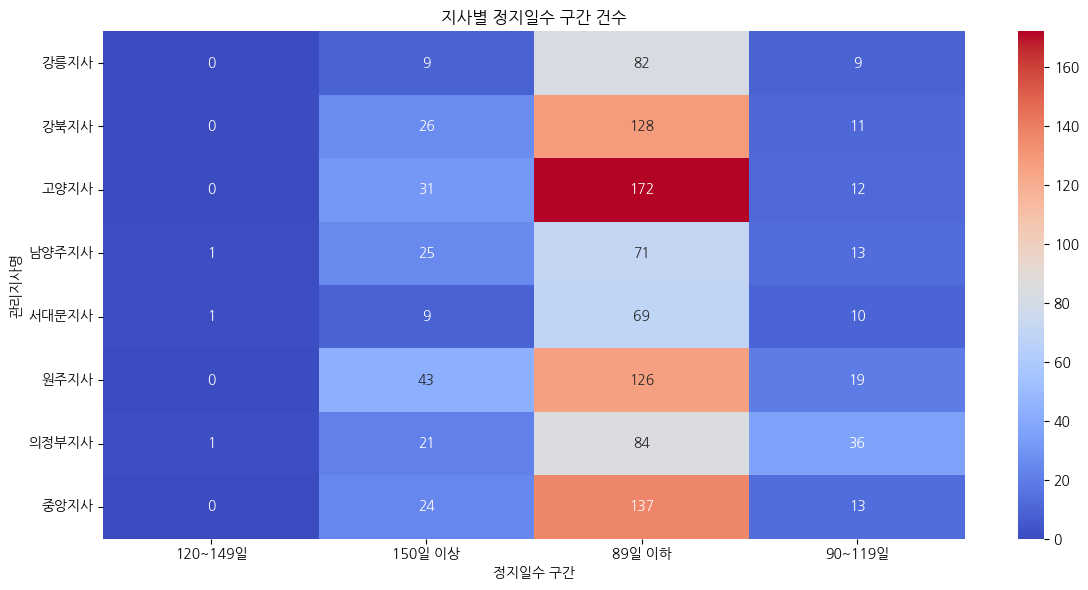

In [ ]:
pivot = df_filtered.pivot_table(index='관리지사명', columns='정지일수 구간', values='계약번호', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('지사별 정지일수 구간 건수')
plt.xlabel('정지일수 구간')
plt.ylabel('관리지사명')
plt.tight_layout()
plt.show()


<ipython-input-68-6c41cf77eec9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['정지시작일자'] = pd.to_datetime(df_filtered['정지시작일자'], errors='coerce')
<ipython-input-68-6c41cf77eec9>:24: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


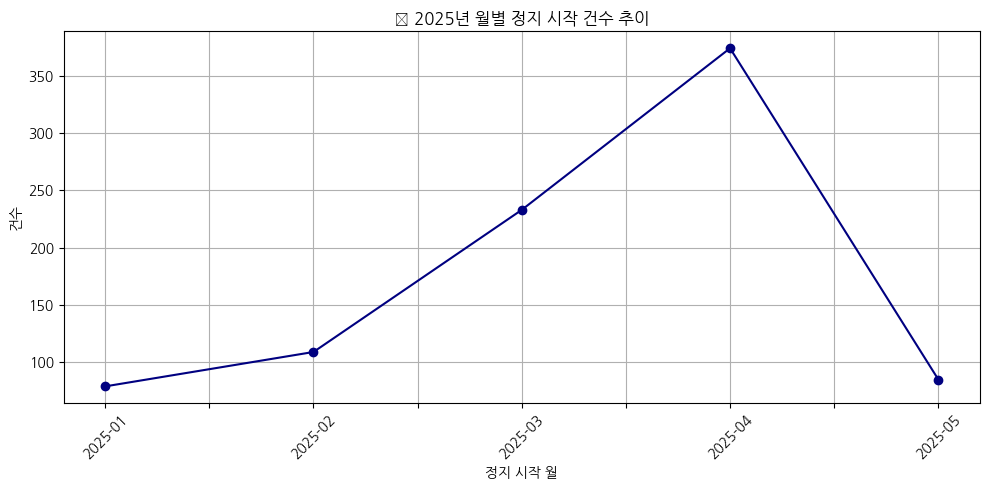

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 날짜 변환
df_filtered['정지시작일자'] = pd.to_datetime(df_filtered['정지시작일자'], errors='coerce')

# ✅ 2025년 데이터만 필터링
df_2025 = df_filtered[df_filtered['정지시작일자'].dt.year == 2025].copy()

# ✅ '정지시작_월' 컬럼 생성
df_2025['정지시작_월'] = df_2025['정지시작일자'].dt.strftime('%Y-%m')

# ✅ 월별 건수 집계
monthly_2025 = df_2025['정지시작_월'].value_counts().sort_index()

# ✅ 시각화
plt.figure(figsize=(10, 5))
monthly_2025.plot(kind='line', marker='o', linestyle='-', color='navy')
plt.title('📅 2025년 월별 정지 시작 건수 추이')
plt.xlabel('정지 시작 월')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-69-dab5149d9f05>:36: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


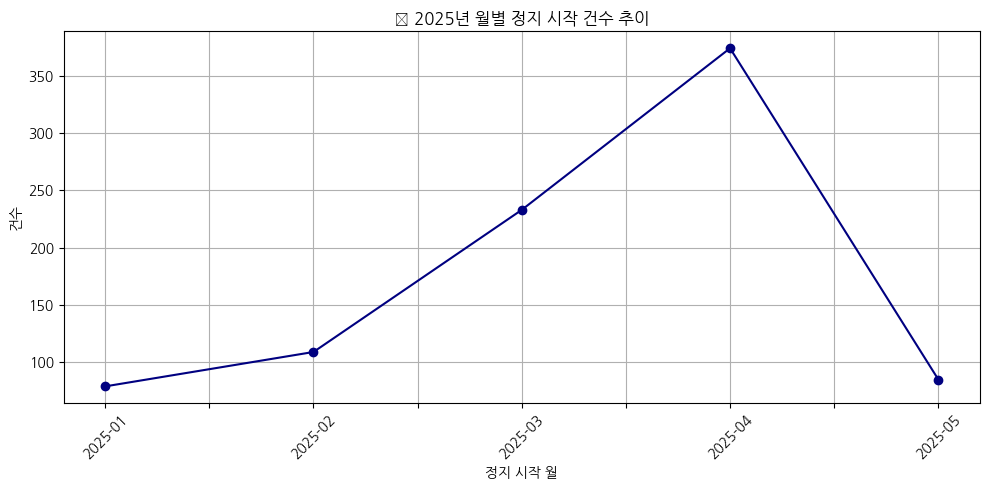

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 파일 경로
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 데이터 로드
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 본부 필터링: 강북/강원본부
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부'].copy()

# ✅ 날짜 형식 변환
df_filtered['정지시작일자'] = pd.to_datetime(df_filtered['정지시작일자'], errors='coerce')

# ✅ 2025년 데이터만 추출
df_2025 = df_filtered[df_filtered['정지시작일자'].dt.year == 2025].copy()

# ✅ 월별 추출 (YYYY-MM 형식)
df_2025['정지시작_월'] = df_2025['정지시작일자'].dt.strftime('%Y-%m')
monthly_2025 = df_2025['정지시작_월'].value_counts().sort_index()

# ✅ 라인차트 시각화
plt.figure(figsize=(10, 5))
monthly_2025.plot(kind='line', marker='o', linestyle='-', color='navy')
plt.title('📅 2025년 월별 정지 시작 건수 추이')
plt.xlabel('정지 시작 월')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ CSV 파일 불러오기
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 강북/강원본부 필터링
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부'].copy()

# ✅ 지사별 계약 건수 및 월정료 합계 계산
branch_summary = df_filtered.groupby('관리지사명').agg({
    '계약번호': 'nunique',
    'KTT월정료': 'sum'
}).reset_index().rename(columns={'계약번호': '정지건수', 'KTT월정료': '총 월정료'})

# ✅ 시각화 - 정지건수
plt.figure(figsize=(10, 5))
sns.barplot(x='정지건수', y='관리지사명', data=branch_summary.sort_values('정지건수', ascending=True), palette='Blues_d')
plt.title('강북/강원본부 지사별 정지건수')
plt.xlabel('정지건수')
plt.ylabel('관리지사명')
plt.tight_layout()
plt.show()

# ✅ 시각화 - 월정료
plt.figure(figsize=(10, 5))
sns.barplot(x='총 월정료', y='관리지사명', data=branch_summary.sort_values('총 월정료', ascending=True), palette='Greens_d')
plt.title('강북/강원본부 지사별 총 월정료')
plt.xlabel('총 월정료 (원)')
plt.ylabel('관리지사명')
plt.tight_layout()
plt.show()

# ✅ 데이터프레임 결과 출력
from IPython.display import display
display(branch_summary.sort_values('정지건수', ascending=False))


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/시설/정지/정지0507.csv'

In [ ]:
import os

folder_path = '/content/drive/MyDrive/시설/정지'
for file in os.listdir(folder_path):
    print(file)


C150_G0000_00013.csv
2025년0422_전사 정지조건리스트_완성.xlsx
2025년0422_전사 정지조건리스트_완성.csv
정지처리분석_2504222.csv
C155_03104_00045.csv
본사정지모음_2024년.csv
정지0507.csv
정지0507_구간별요약.xlsx


In [ ]:
import os

search_name = '정지0507.csv'
base_path = '/content/drive/MyDrive/시설/정지'

for root, dirs, files in os.walk(base_path):
    for f in files:
        if search_name in f:
            print("✅ 파일 경로:", os.path.join(root, f))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ✅ 파일 경로 (이전 경로를 기반으로)
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 데이터 불러오기
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 결측치 제거
df_ml = df[['KTT월정료', '정지일수']].dropna()

# ✅ 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_ml)

# ✅ 클러스터링 (3개 군집 가정)
kmeans = KMeans(n_clusters=3, random_state=42)
df_ml['Cluster'] = kmeans.fit_predict(scaled_data)

# ✅ 클러스터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ml, x='KTT월정료', y='정지일수', hue='Cluster', palette='Set2')
plt.title('K-Means 클러스터링 (월정료 vs 정지일수)')
plt.xlabel('KTT월정료')
plt.ylabel('정지일수')
plt.tight_layout()
plt.show()

# ✅ 클러스터별 평균 요약
cluster_summary = df_ml.groupby('Cluster').agg({'KTT월정료': 'mean', '정지일수': 'mean', 'Cluster': 'count'}).rename(columns={'Cluster': '건수'})
import ace_tools as tools; tools.display_dataframe_to_user(name="클러스터 요약", dataframe=cluster_summary)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/시설/정지/정지0507.csv'

In [ ]:
from IPython.display import display

# ✅ 클러스터별 평균 요약 보기 좋게 출력
cluster_summary = df_ml.groupby('Cluster').agg({
    'KTT월정료': 'mean',
    '정지일수': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': '건수'})

# 소수점 둘째 자리까지 반올림
cluster_summary = cluster_summary.round(2)

display(cluster_summary)


NameError: name 'df_ml' is not defined

In [ ]:
# 클러스터와 관리지사명 기준 그룹화
cluster_branch = df_ml.groupby(['Cluster', '관리지사명']).size().unstack(fill_value=0)

# 히트맵으로 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_branch, annot=True, fmt='d', cmap='YlGnBu')
plt.title('클러스터별 관리지사 분포')
plt.ylabel('Cluster')
plt.xlabel('관리지사명')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: '관리지사명'

In [ ]:
# 클러스터링을 위한 원본 feature 준비
features = df[['KTT월정료', '정지일수']].dropna()

# 클러스터링
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 클러스터 결과와 원본 정보 통합
df_ml = df[['관리지사명', '계약번호', 'KTT월정료', '정지일수', 'Cluster']].copy()


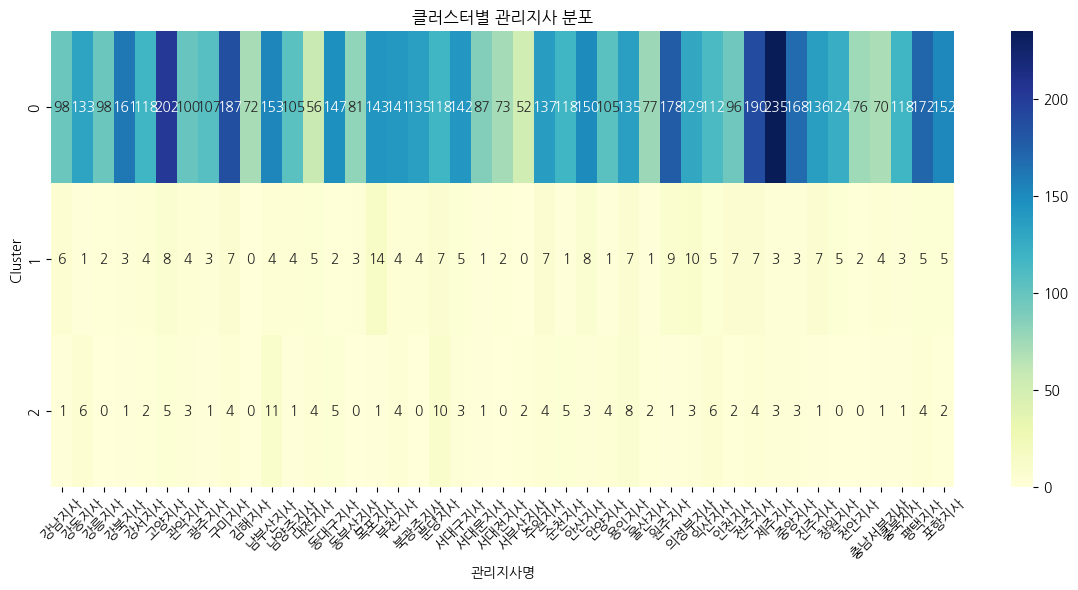

In [ ]:
# 클러스터와 관리지사명 기준 그룹화
cluster_branch = df_ml.groupby(['Cluster', '관리지사명']).size().unstack(fill_value=0)

# 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_branch, annot=True, fmt='d', cmap='YlGnBu')
plt.title('클러스터별 관리지사 분포')
plt.ylabel('Cluster')
plt.xlabel('관리지사명')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


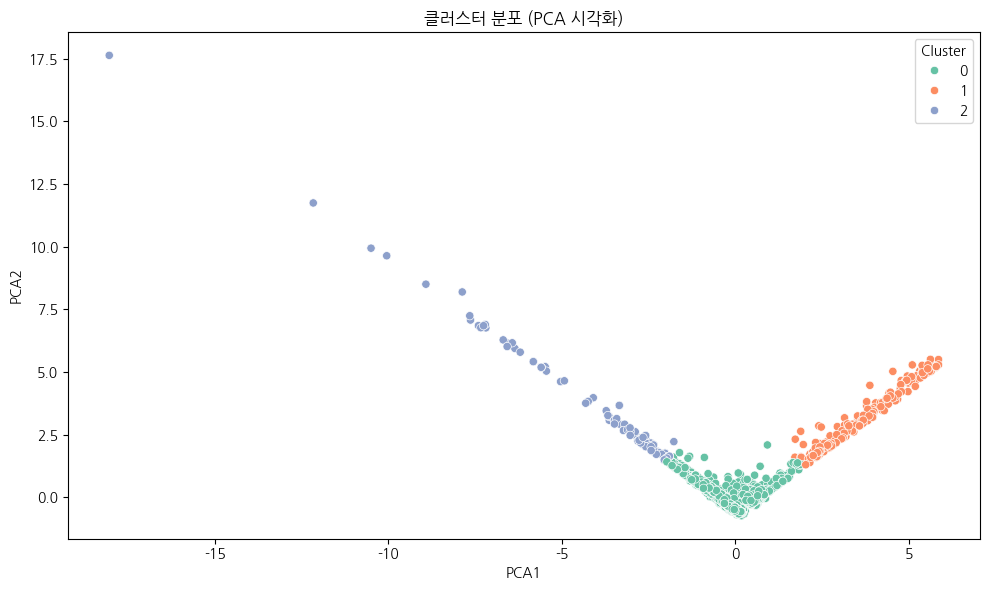

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 데이터 불러오기
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# 결측치 제거
df_ml = df[['관리지사명', '계약번호', 'KTT월정료', '정지일수']].dropna()

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml[['KTT월정료', '정지일수']])

# 클러스터링 (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)
df_ml['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA로 2차원 시각화용 차원 축소
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_ml['PCA1'] = components[:, 0]
df_ml['PCA2'] = components[:, 1]

# 클러스터별 분포 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ml, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('클러스터 분포 (PCA 시각화)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.tight_layout()
plt.show()

# 클러스터별 지사 분포 확인용 피벗
cluster_branch = df_ml.groupby(['Cluster', '관리지사명']).size().unstack(fill_value=0)

import ace_tools as tools; tools.display_dataframe_to_user(name="클러스터별 지사 분포", dataframe=cluster_branch)
$#

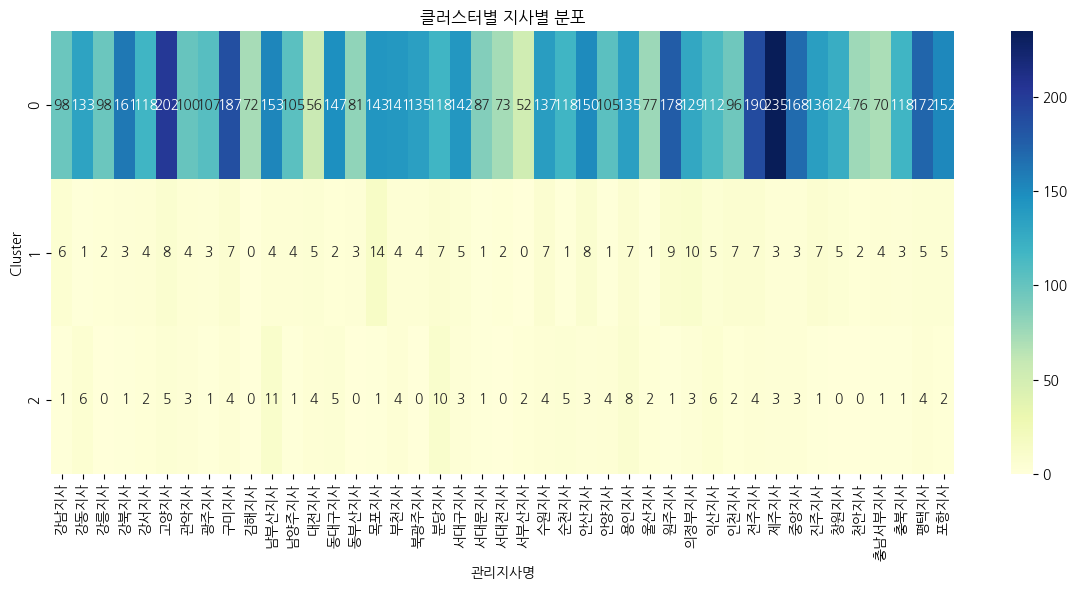

In [ ]:
# ✅ 원본 컬럼 중 'Cluster'와 '관리지사명'만 따로 추출하여 병합
df_ml = df_ml.copy()
df_ml['관리지사명'] = df.loc[df_ml.index, '관리지사명']

# ✅ 클러스터별 관리지사별 건수 파악
cluster_branch = df_ml.groupby(['Cluster', '관리지사명']).size().unstack(fill_value=0)

# ✅ 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_branch, annot=True, fmt='d', cmap='YlGnBu')
plt.title("클러스터별 지사별 분포")
plt.xlabel("관리지사명")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


Mounted at /content/drive


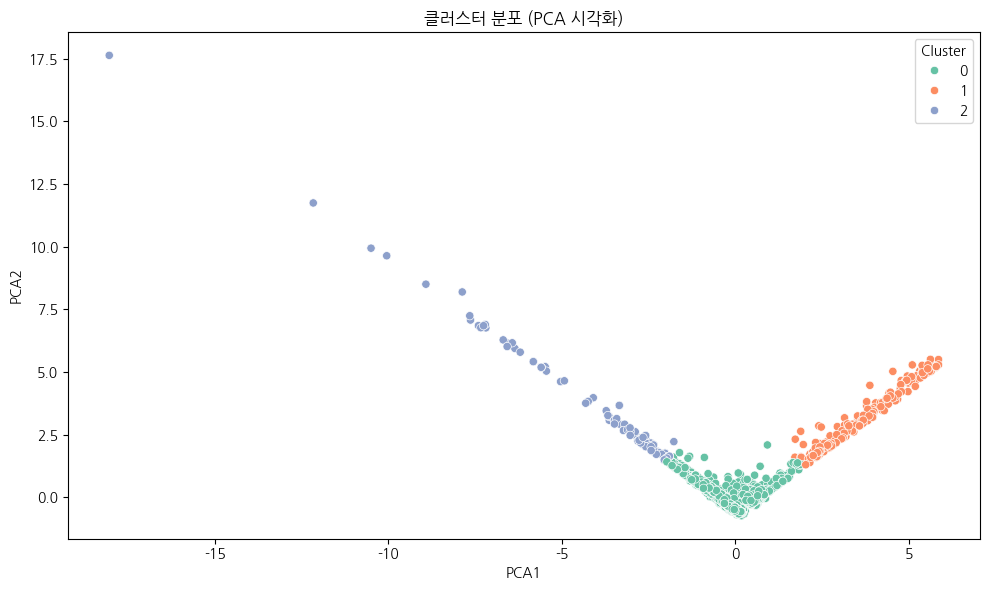

,KTT월정료,정지일수,건수
Cluster,,,
0,56352.138667,98.873956,5387
1,33643.953368,1544.062176,193
2,540843.598361,69.868852,122


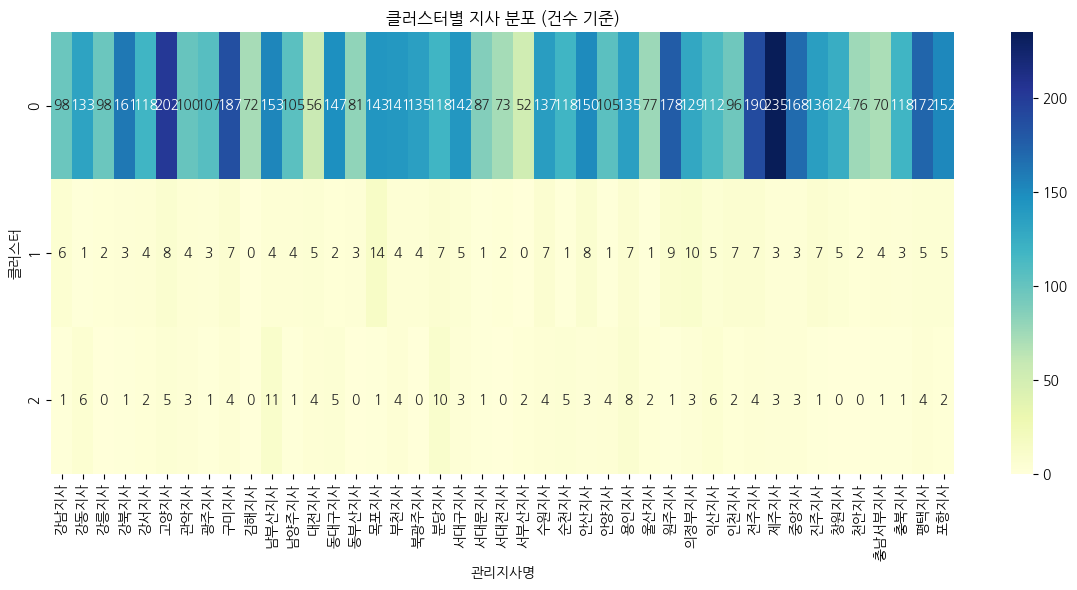

In [ ]:
# ✅ 1. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 2. 라이브러리 불러오기
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ✅ 3. 파일 경로 및 로딩
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 4. 숫자형 컬럼 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 5. 필요 데이터만 필터링
df_ml = df[['KTT월정료', '정지일수']].dropna()

# ✅ 6. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)

# ✅ 7. KMeans 클러스터링 (클러스터 수 3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_ml['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ 8. PCA 시각화
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_ml['PCA1'], df_ml['PCA2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ml, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("클러스터 분포 (PCA 시각화)")
plt.tight_layout()
plt.show()

# ✅ 9. 클러스터 요약
summary = df_ml.groupby('Cluster').agg({
    'KTT월정료': 'mean',
    '정지일수': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': '건수'})
display(summary)

# ✅ 10. 원본과 클러스터 병합
df = df.join(df_ml['Cluster'], how='left')

# ✅ 11. 지사별 클러스터 분포 분석
if '관리지사명' in df.columns:
    cluster_branch = df.groupby(['Cluster', '관리지사명']).size().unstack(fill_value=0)

    plt.figure(figsize=(12, 6))
    sns.heatmap(cluster_branch, annot=True, fmt='d', cmap='YlGnBu')
    plt.title("클러스터별 지사 분포 (건수 기준)")
    plt.xlabel("관리지사명")
    plt.ylabel("클러스터")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ '관리지사명' 컬럼이 존재하지 않아 지사 분석은 생략되었습니다.")


Mounted at /content/drive


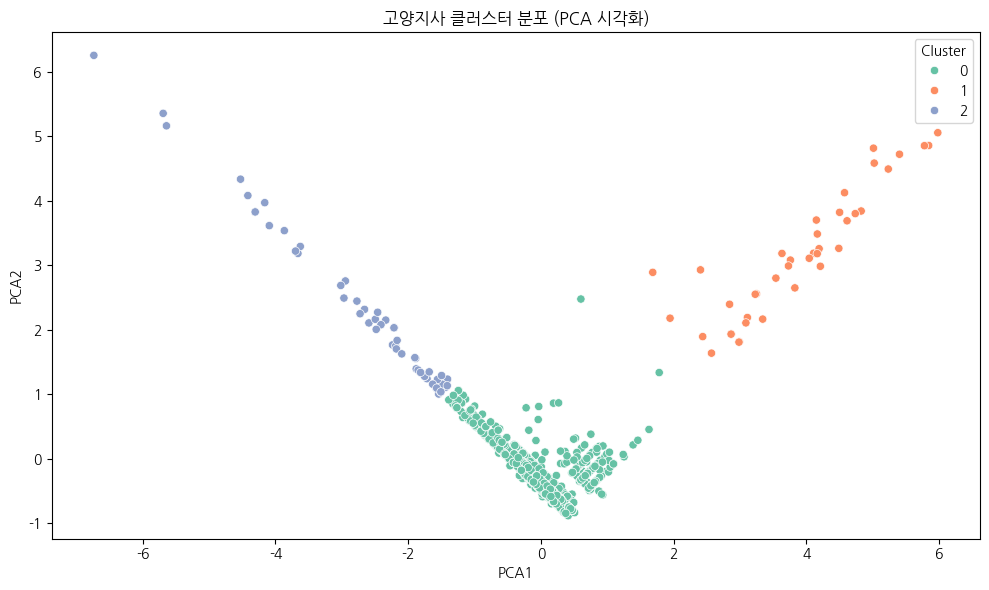

,KTT월정료,정지일수,건수
Cluster,,,
0,56450.808824,80.580882,1088
1,36000.000000,1598.025000,40
2,264398.363636,50.200000,55


In [ ]:
# ✅ 1. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 2. 라이브러리 불러오기
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ✅ 3. 파일 로드
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 4. 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 5. 고양지사 필터링
df_goyang = df[df['관리본부명'].str.strip() == '강북/강원본부'].copy()

# ✅ 6. 머신러닝 데이터 준비
df_ml = df_goyang[['KTT월정료', '정지일수']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)

# ✅ 7. 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_ml['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ 8. PCA 시각화
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_ml['PCA1'], df_ml['PCA2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ml, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("고양지사 클러스터 분포 (PCA 시각화)")
plt.tight_layout()
plt.show()

# ✅ 9. 클러스터별 요약
summary = df_ml.groupby('Cluster').agg({
    'KTT월정료': 'mean',
    '정지일수': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': '건수'})
display(summary)


Mounted at /content/drive


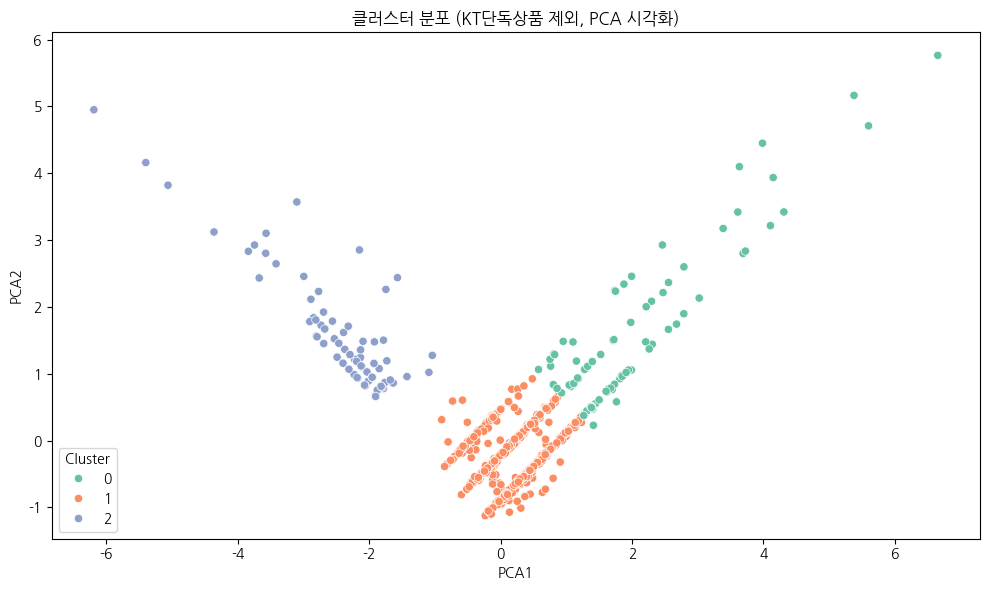


[📊 클러스터별 평균 요약]
                KTT월정료        정지일수   건수
Cluster                                
0        220141.022727   50.454545   88
1         58628.528571   53.052381  840
2         31447.916667  241.291667   96


In [ ]:
# ✅ 1. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 2. 라이브러리 불러오기
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ✅ 3. 파일 로드
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 4. 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 5. 강북/강원본부 중 고양지사 + 서비스(소) 필터링
df_filtered = df[
    (df['관리본부명'].str.strip() == '강북/강원본부') &
#    (df['관리지사명'].str.contains('고양')) &
    (~df['서비스(소)'].str.contains('KT단독상품', na=False))
].copy()

# ✅ 6. 머신러닝 데이터 준비
df_ml = df_filtered[['KTT월정료', '정지일수']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)

# ✅ 7. 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_ml['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ 8. PCA 시각화
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_ml['PCA1'], df_ml['PCA2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ml, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("클러스터 분포 (KT단독상품 제외, PCA 시각화)")
plt.tight_layout()
plt.show()

# ✅ 9. 클러스터별 요약
summary = df_ml.groupby('Cluster').agg({
    'KTT월정료': 'mean',
    '정지일수': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': '건수'})

# ✅ 10. 결과 출력
print("\n[📊 클러스터별 평균 요약]")
print(summary)


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ✅ 3. 파일 로드
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 데이터 불러오기 및 정리
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 본부 필터링 (강북/강원본부)
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부'].copy()

# ✅ KT단독상품 제외
# df_filtered = df_filtered[~df_filtered['서비스(소)'].str.contains("KT단독", na=False)]

# ✅ 시간 처리
df_filtered['정지시작일자'] = pd.to_datetime(df_filtered['정지시작일자'], errors='coerce')
df_filtered['정지시작_월'] = df_filtered['정지시작일자'].dt.to_period('M').astype(str)

# ✅ 머신러닝 클러스터링
df_ml = df_filtered[['KTT월정료', '정지일수']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)

kmeans = KMeans(n_clusters=3, random_state=42)
df_ml['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ PCA 시각화
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_ml['PCA1'], df_ml['PCA2'] = components[:, 0], components[:, 1]

# ✅ 클러스터 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ml, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("강북/강원본부 클러스터 분포 (PCA)")
plt.tight_layout()
plt.show()

# ✅ 클러스터별 요약
cluster_summary = df_ml.groupby('Cluster').agg({
    'KTT월정료': 'mean',
    '정지일수': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': '건수'})

# ✅ 정지 시작 월별 건수 추이
monthly = df_filtered.groupby('정지시작_월').size()
plt.figure(figsize=(10, 4))
monthly.plot(marker='o', linestyle='-', color='teal')
plt.title('정지 시작 월별 건수 추이 (강북/강원본부)')
plt.xlabel('정지 시작 월')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 서비스(소) 유형별 분포
plt.figure(figsize=(12, 5))
df_filtered['서비스(소)'].value_counts().head(10).plot(kind='bar')
plt.title('상위 10개 서비스(소) 유형별 정지건수 (강북/강원본부)')
plt.ylabel('건수')
plt.xlabel('서비스(소) 유형')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import ace_tools as tools; tools.display_dataframe_to_user(name="클러스터 요약", dataframe=cluster_summary)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/시설/정지/정지0507.csv'

In [ ]:
import os

base_path = '/content/drive/MyDrive/시설/정지'
for file in os.listdir(base_path):
    print(file)


C150_G0000_00013.csv
2025년0422_전사 정지조건리스트_완성.xlsx
2025년0422_전사 정지조건리스트_완성.csv
정지처리분석_2504222.csv
C155_03104_00045.csv
본사정지모음_2024년.csv
정지0507.csv
정지0507_구간별요약.xlsx


In [ ]:
# 쥬피터노트북 버전

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 파일 경로 설정 (필요 시 절대 경로로 수정)
file_path = '정지0507.csv'  # 예: 'D:/파일경로/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')

# ✅ 강북/강원본부 + KT단독 제외
df_filtered = df[
    (df['관리본부명'].str.strip() == '강북/강원본부') &
    (~df['서비스(소)'].str.contains("KT단독", na=False))
].copy()

# ✅ 날짜 처리 및 월 추출
df_filtered['정지시작일자'] = pd.to_datetime(df_filtered['정지시작일자'], errors='coerce')
df_filtered['정지시작_월'] = df_filtered['정지시작일자'].dt.to_period('M').astype(str)

# ✅ 월별 집계
monthly_summary = df_filtered.groupby('정지시작_월').agg({
    '계약번호': 'count',
    'KTT월정료': 'sum'
}).rename(columns={'계약번호': '건수', 'KTT월정료': '총 월정료'})
monthly_summary['월정료(백만원)'] = (monthly_summary['총 월정료'] / 10000).round(1)

# ✅ 시각화
fig, ax1 = plt.subplots(figsize=(12, 5))

# 건수 라인
ax1.set_xlabel('정지 시작 월')
ax1.set_ylabel('건수', color='tab:blue')
ax1.plot(monthly_summary.index, monthly_summary['건수'], marker='o', color='tab:blue')
for i, v in enumerate(monthly_summary['건수']):
    ax1.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=8, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=45)

# 월정료 라인 (보조축)
ax2 = ax1.twinx()
ax2.set_ylabel('월정료 (백만원)', color='tab:green')
ax2.plot(monthly_summary.index, monthly_summary['월정료(백만원)'], marker='s', linestyle='--', color='tab:green')
for i, v in enumerate(monthly_summary['월정료(백만원)']):
    ax2.text(i, v + 0.5, f'{v}', ha='center', va='bottom', fontsize=8, color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.title('월별 정지 건수 및 월정료 (강북/강원본부)')
plt.tight_layout()
plt.show()

In [ ]:
import os

folder_path = '/content/drive/MyDrive/시설/정지'
for file in os.listdir(folder_path):
    print(file)

C150_G0000_00013.csv
2025년0422_전사 정지조건리스트_완성.xlsx
2025년0422_전사 정지조건리스트_완성.csv
정지처리분석_2504222.csv
C155_03104_00045.csv
본사정지모음_2024년.csv
정지0507.csv
정지0507_구간별요약.xlsx


In [ ]:
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'  # 파일명 정확히 일치하게

Mounted at /content/drive


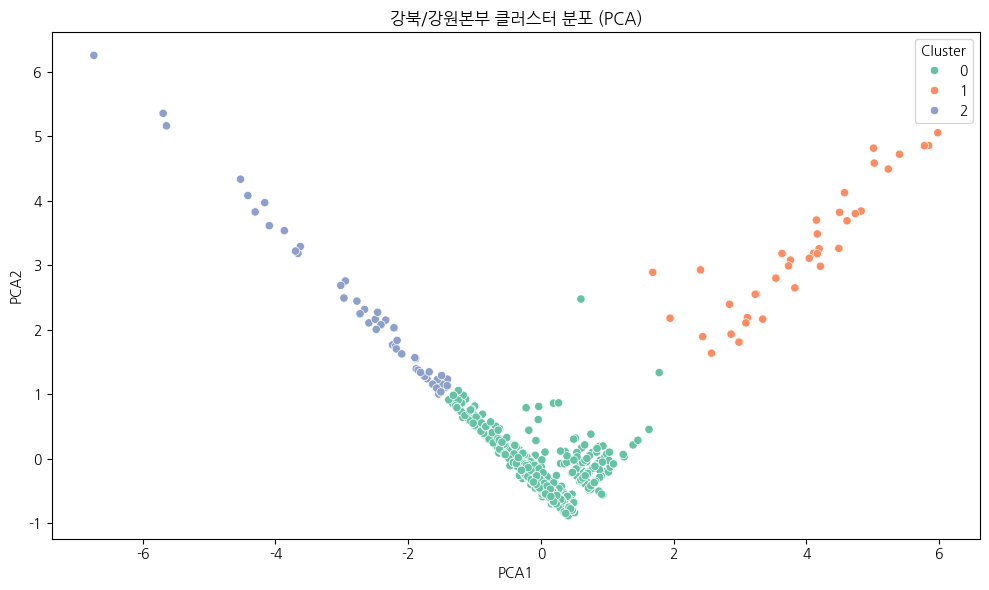

,KTT월정료,정지일수,건수
Cluster,,,
0,56450.808824,80.580882,1088
1,36000.000000,1598.025000,40
2,264398.363636,50.200000,55


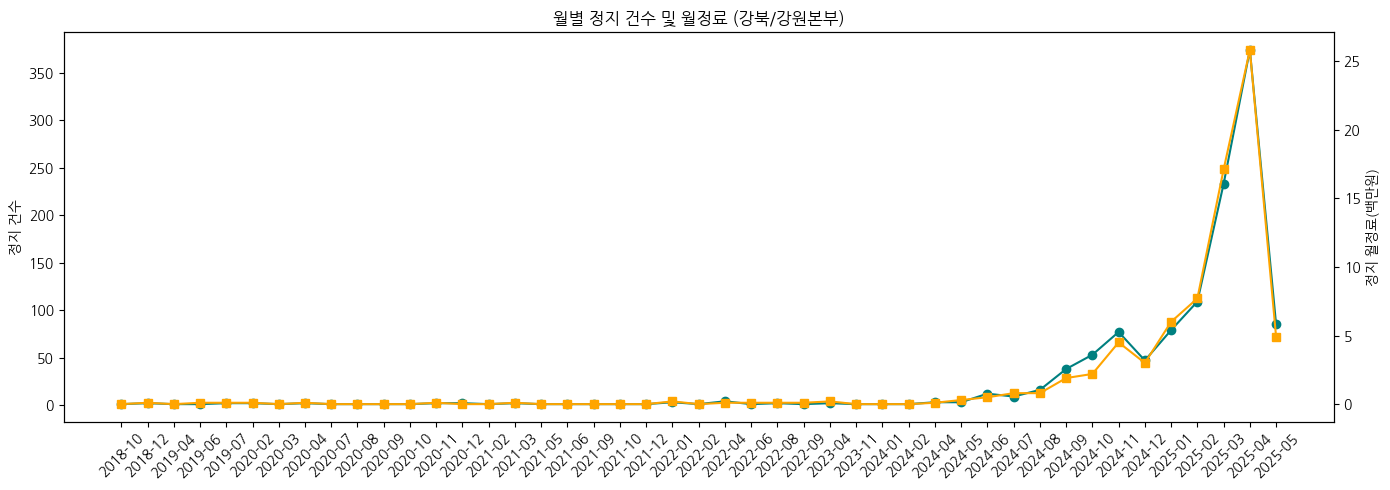

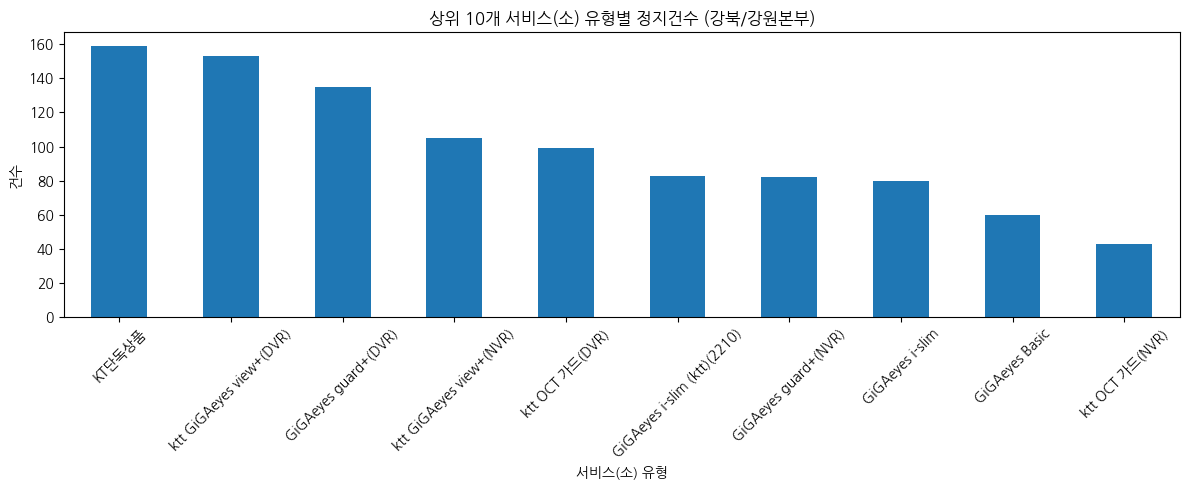

In [ ]:
# ✅ 1. Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 2. 라이브러리 불러오기
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ✅ 3. 파일 경로 설정
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 4. 파일 불러오기 및 정리
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['정지시작일자'] = pd.to_datetime(df['정지시작일자'], errors='coerce')
df['정지시작_월'] = df['정지시작일자'].dt.to_period('M').astype(str)

# ✅ 5. 강북/강원본부만 필터링
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부'].copy()

# ✅ 6. 클러스터링 (K-Means)
df_ml = df_filtered[['KTT월정료', '정지일수']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml)
kmeans = KMeans(n_clusters=3, random_state=42)
df_ml['Cluster'] = kmeans.fit_predict(X_scaled)

# ✅ 7. PCA 시각화
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df_ml['PCA1'], df_ml['PCA2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ml, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("강북/강원본부 클러스터 분포 (PCA)")
plt.tight_layout()
plt.show()

# ✅ 8. 클러스터 요약 통계
cluster_summary = df_ml.groupby('Cluster').agg({
    'KTT월정료': 'mean',
    '정지일수': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': '건수'})
display(cluster_summary)

# ✅ 9. 월별 정지 건수 + 월정료 시계열
monthly_stats = df_filtered.groupby('정지시작_월').agg({
    '계약번호': 'count',
    'KTT월정료': lambda x: round(x.sum() / 1000000, 1)  # 백만원 단위
}).rename(columns={'계약번호': '건수', 'KTT월정료': '월정료(백만원)'})
monthly_stats = monthly_stats.sort_index()

# ✅ 10. 라인차트로 건수 및 금액 표시
fig, ax1 = plt.subplots(figsize=(14, 5))
ax2 = ax1.twinx()

ax1.plot(monthly_stats.index, monthly_stats['건수'], color='teal', marker='o', label='건수')
ax2.plot(monthly_stats.index, monthly_stats['월정료(백만원)'], color='orange', marker='s', label='월정료(백만원)')

ax1.set_ylabel('정지 건수')
ax2.set_ylabel('정지 월정료(백만원)')
plt.title('월별 정지 건수 및 월정료 (강북/강원본부)')
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()
plt.show()

# ✅ 11. 서비스(소) 유형별 상위 분석
plt.figure(figsize=(12, 5))
df_filtered['서비스(소)'].value_counts().head(10).plot(kind='bar')
plt.title('상위 10개 서비스(소) 유형별 정지건수 (강북/강원본부)')
plt.ylabel('건수')
plt.xlabel('서비스(소) 유형')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=cluster_summary)

https://docs.google.com/spreadsheets/d/1J51dhKpPoirPj2J3pYgdp8Qil0FTXCOYlQaRUyY9oPM/edit#gid=0


<ipython-input-31-c84eabec09e3>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_stats.index, rotation=45)


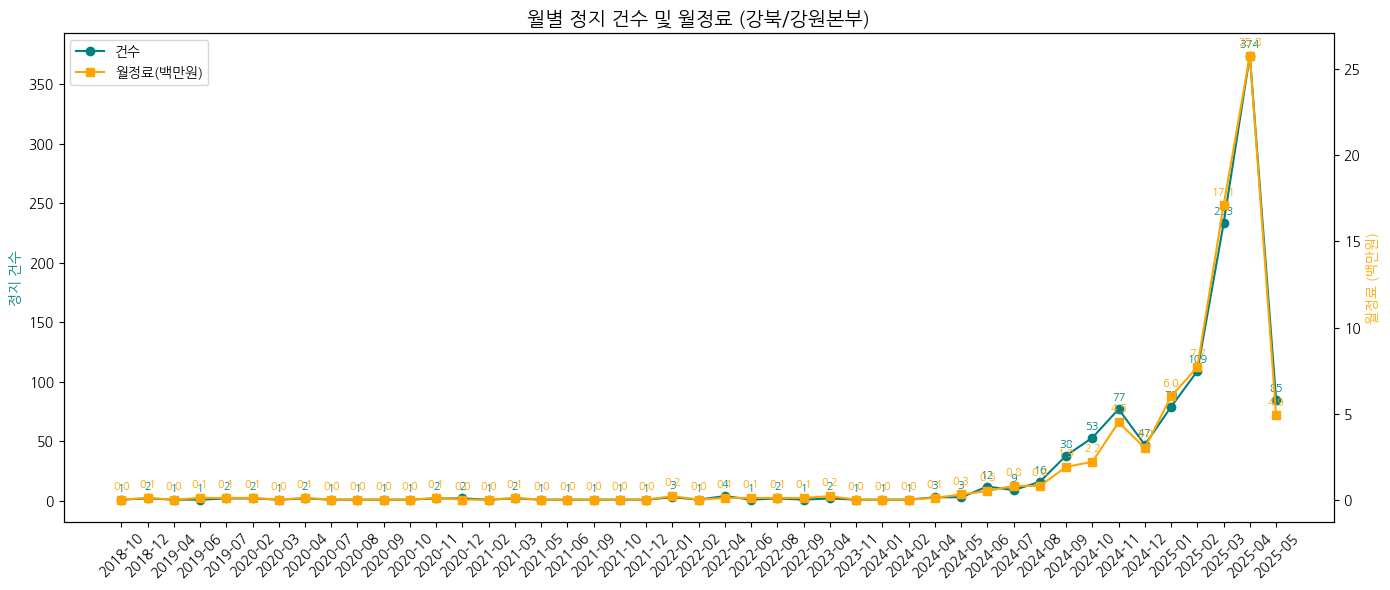

In [ ]:
# ✅ 월별 정지 건수 및 월정료 시계열 (건수 + 금액 직접 표시)
fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

# 선 그래프
line1 = ax1.plot(monthly_stats.index, monthly_stats['건수'], color='teal', marker='o', label='건수')
line2 = ax2.plot(monthly_stats.index, monthly_stats['월정료(백만원)'], color='orange', marker='s', label='월정료(백만원)')

# 각 포인트에 값 표시
for i, (x, y) in enumerate(zip(monthly_stats.index, monthly_stats['건수'])):
    ax1.text(x, y + 5, f'{y}', ha='center', va='bottom', fontsize=8, color='teal')

for i, (x, y) in enumerate(zip(monthly_stats.index, monthly_stats['월정료(백만원)'])):
    ax2.text(x, y + 0.5, f'{y:.1f}', ha='center', va='bottom', fontsize=8, color='orange')

# 축 설정 및 타이틀
ax1.set_ylabel('정지 건수', color='teal')
ax2.set_ylabel('월정료 (백만원)', color='orange')
plt.title('월별 정지 건수 및 월정료 (강북/강원본부)', fontsize=14)
ax1.set_xticklabels(monthly_stats.index, rotation=45)

# 범례 통합
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

Mounted at /content/drive
✅ 파일 로드 성공: /content/drive/MyDrive/시설/정지/정지0507.csv


<ipython-input-36-630dc338345d>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_stats.index, rotation=45)


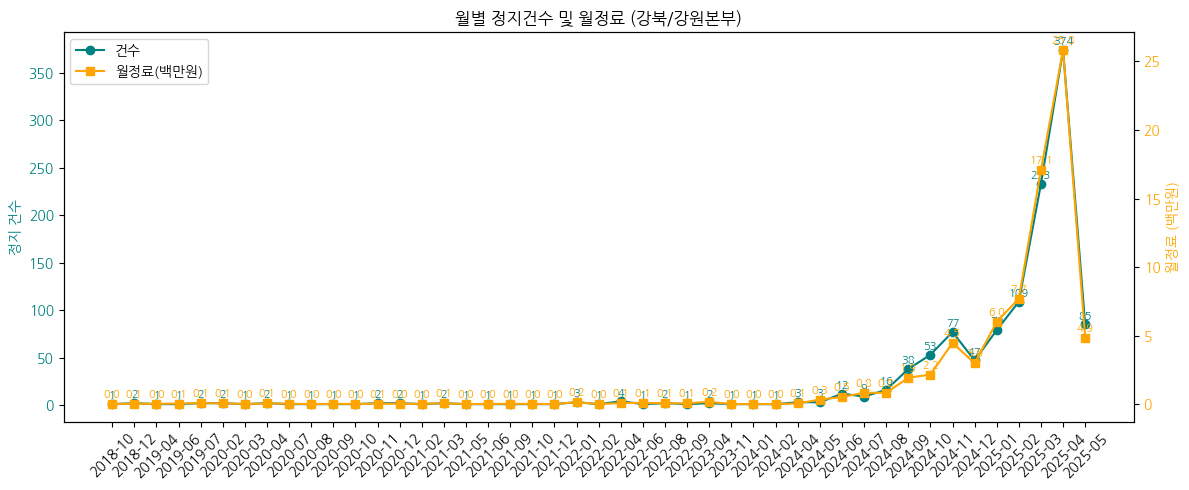

In [ ]:
# ✅ Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 필요한 패키지 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ✅ 정확한 파일 경로 지정
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 파일 존재 확인
if not os.path.exists(file_path):
    raise FileNotFoundError("❌ 정확한 경로에 파일이 없습니다.")
else:
    print("✅ 파일 로드 성공:", file_path)

# ✅ CSV 불러오기
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 숫자형 변환
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')

# ✅ 날짜 및 본부 처리
df['정지시작일자'] = pd.to_datetime(df['정지시작일자'], errors='coerce')
df['정지시작_월'] = df['정지시작일자'].dt.to_period('M').astype(str)
df_filtered = df[df['관리본부명'].str.strip() == '강북/강원본부'].copy()

# ✅ 월별 요약
monthly_stats = df_filtered.groupby('정지시작_월').agg({
    '계약번호': 'count',
    'KTT월정료': lambda x: x.sum() / 1000000  # 백만원 단위
}).rename(columns={'계약번호': '건수', 'KTT월정료': '월정료(백만원)'})

# ✅ 시각화
fig, ax1 = plt.subplots(figsize=(12, 5))

line1 = ax1.plot(monthly_stats.index, monthly_stats['건수'], marker='o', color='teal', label='건수')
ax1.set_ylabel('정지 건수', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_xticklabels(monthly_stats.index, rotation=45)

for i, v in enumerate(monthly_stats['건수']):
    ax1.text(i, v + 5, str(v), color='teal', ha='center', fontsize=8)

ax2 = ax1.twinx()
line2 = ax2.plot(monthly_stats.index, monthly_stats['월정료(백만원)'], marker='s', color='orange', label='월정료(백만원)')
ax2.set_ylabel('월정료 (백만원)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

for i, v in enumerate(monthly_stats['월정료(백만원)']):
    ax2.text(i, v + 0.5, f"{v:.1f}", color='orange', ha='center', fontsize=8)

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('월별 정지건수 및 월정료 (강북/강원본부)')
plt.tight_layout()
plt.show()

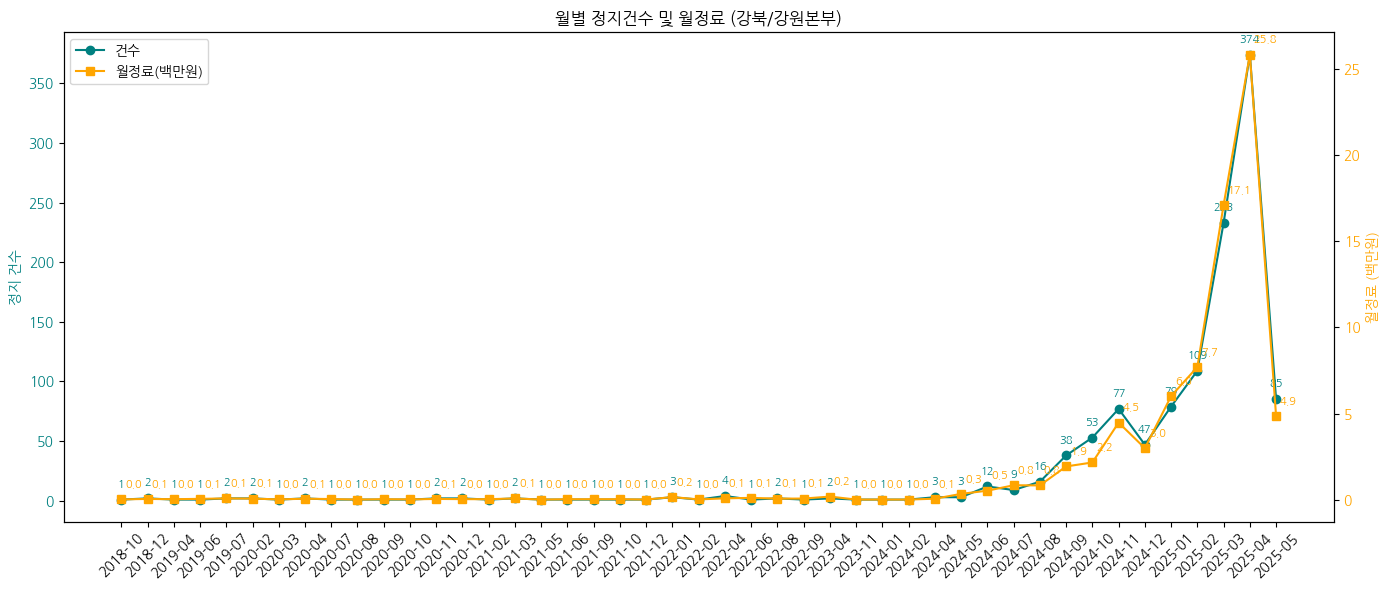

In [ ]:
import matplotlib.pyplot as plt

# ✅ 시각화 (겹침 방지 개선)
fig, ax1 = plt.subplots(figsize=(14, 6))

# 1. 건수 라인
line1 = ax1.plot(monthly_stats.index, monthly_stats['건수'], marker='o', color='teal', label='건수')
ax1.set_ylabel('정지 건수', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')
ax1.set_xticks(range(len(monthly_stats.index)))
ax1.set_xticklabels(monthly_stats.index, rotation=45)

# ✅ 겹침 방지를 위한 위쪽 간격 조절
for i, v in enumerate(monthly_stats['건수']):
    ax1.text(i, v + 10, str(v), color='teal', ha='center', fontsize=8)

# 2. 월정료 라인 (오른쪽 y축)
ax2 = ax1.twinx()
line2 = ax2.plot(monthly_stats.index, monthly_stats['월정료(백만원)'], marker='s', color='orange', label='월정료(백만원)')
ax2.set_ylabel('월정료 (백만원)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# ✅ 월정료 값도 살짝 오른쪽 위로 띄우기
for i, v in enumerate(monthly_stats['월정료(백만원)']):
    ax2.text(i + 0.15, v + 0.7, f"{v:.1f}", color='orange', ha='left', fontsize=8)

# ✅ 범례 통합
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('월별 정지건수 및 월정료 (강북/강원본부)')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
# ✅ 1. 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 2. 기본 라이브러리
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 정확한 파일 경로 지정
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 파일 존재 확인
if not os.path.exists(file_path):
    raise FileNotFoundError("❌ 정확한 경로에 파일이 없습니다.")
else:
    print("✅ 파일 로드 성공:", file_path)

# ✅ 숫자형 및 날짜형 변환
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['정지시작일자'] = pd.to_datetime(df['정지시작일자'], errors='coerce')
df['정지시작_월'] = df['정지시작일자'].dt.to_period('M').astype(str)

# ✅ 히트맵 분석: 월정료 구간 vs 정지일수 구간
df['정지일수 구간'] = df['정지일수'].apply(lambda x: '89일 이하' if x <= 89 else '90~119일' if x <= 119 else '120~149일' if x <= 149 else '150일 이상')
df['월정료 구간'] = df['KTT월정료'].apply(lambda x: '5만 이하' if x <= 50000 else '5만~7만' if x <= 70000 else '7만~10만' if x <= 100000 else '10만~20만' if x <= 200000 else '20만~50만' if x <= 500000 else '50만 초과')

pivot_data = df.groupby(['월정료 구간', '정지일수 구간']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlOrBr')
plt.title('월정료 구간 vs 정지일수 구간별 계약건수')
plt.tight_layout()
plt.show()

# ✅ 강북/강원본부 지사별 시계열
df_g = df[df['관리본부명'].str.strip() == '강북/강원본부']
gisa_monthly = df_g.groupby(['관리지사명', '정지시작_월']).size().reset_index(name='건수')
gisa_pivot = gisa_monthly.pivot(index='정지시작_월', columns='관리지사명', values='건수').fillna(0)

plt.figure(figsize=(14, 6))
for col in gisa_pivot.columns:
    plt.plot(gisa_pivot.index, gisa_pivot[col], marker='o', label=col)
plt.title('강북/강원본부 지사별 월별 정지 건수')
plt.xlabel('정지 시작 월')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.legend(title='관리지사명', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

Mounted at /content/drive
✅ 파일 로드 성공: /content/drive/MyDrive/시설/정지/정지0507.csv


NameError: name 'df' is not defined

In [ ]:
# ✅ 1. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 2. 라이브러리 불러오기
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 3. 정확한 파일 경로
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 4. 데이터 로드 및 정제
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['정지시작일자'] = pd.to_datetime(df['정지시작일자'], errors='coerce')
df['정지시작_월'] = df['정지시작일자'].dt.to_period('M').astype(str)

# ✅ 5. 구간 생성
df['정지일수 구간'] = df['정지일수'].apply(
    lambda x: '89일 이하' if x <= 89 else
              '90~119일' if x <= 119 else
              '120~149일' if x <= 149 else
              '150일 이상'
)
df['월정료 구간'] = df['KTT월정료'].apply(
    lambda x: '5만 이하' if x <= 50000 else
              '5만~7만' if x <= 70000 else
              '7만~10만' if x <= 100000 else
              '10만~20만' if x <= 200000 else
              '20만~50만' if x <= 500000 else
              '50만 초과'
)

# ✅ 6. 히트맵 시각화
pivot_data = df.groupby(['월정료 구간', '정지일수 구간']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlOrBr')
plt.title('월정료 구간 vs 정지일수 구간별 계약건수')
plt.tight_layout()
plt.show()

# ✅ 7. 지사별 월별 정지 건수 (강북/강원본부)
df_g = df[df['관리본부명'].str.strip() == '강북/강원본부']
gisa_monthly = df_g.groupby(['관리지사명', '정지시작_월']).size().reset_index(name='건수')
gisa_pivot = gisa_monthly.pivot(index='정지시작_월', columns='관리지사명', values='건수').fillna(0)

plt.figure(figsize=(14, 6))
for col in gisa_pivot.columns:
    plt.plot(gisa_pivot.index, gisa_pivot[col], marker='o', label=col)
plt.title('강북/강원본부 지사별 월별 정지 건수')
plt.xlabel('정지 시작 월')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.legend(title='관리지사명', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

MessageError: Error: credential propagation was unsuccessful

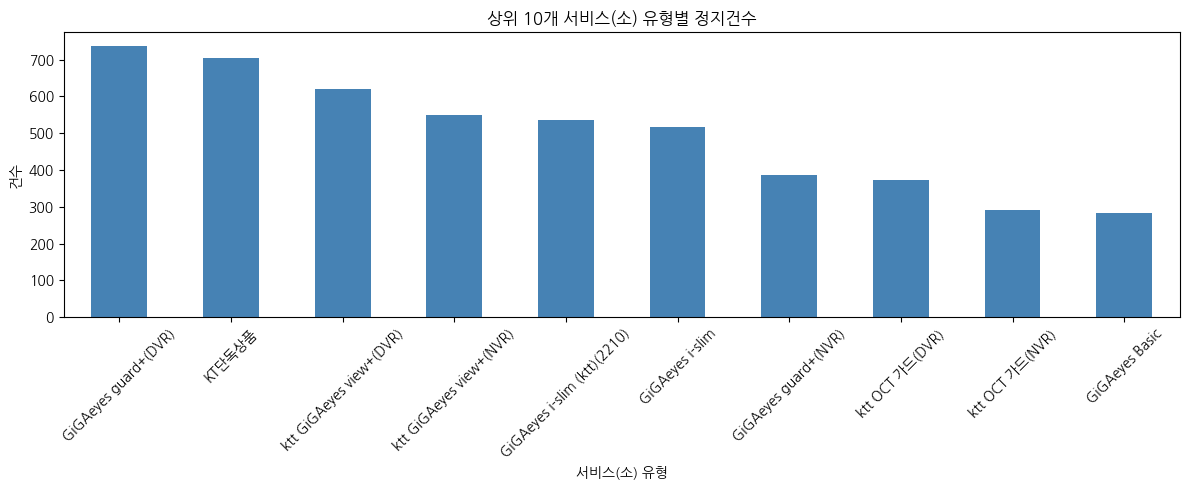

In [ ]:
top_services = df['서비스(소)'].value_counts().head(10)

plt.figure(figsize=(12, 5))
top_services.plot(kind='bar', color='steelblue')
plt.title('상위 10개 서비스(소) 유형별 정지건수')
plt.ylabel('건수')
plt.xlabel('서비스(소) 유형')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mounted at /content/drive


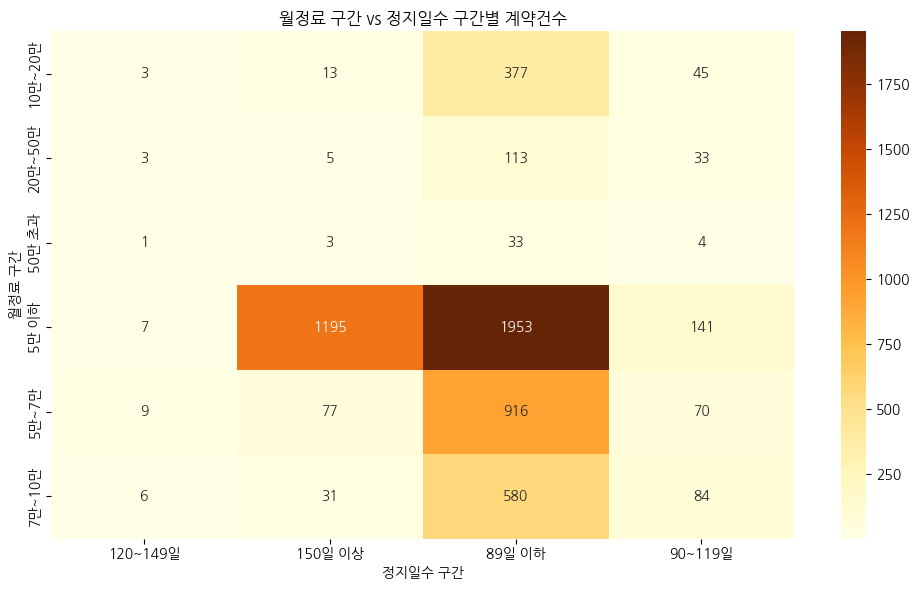

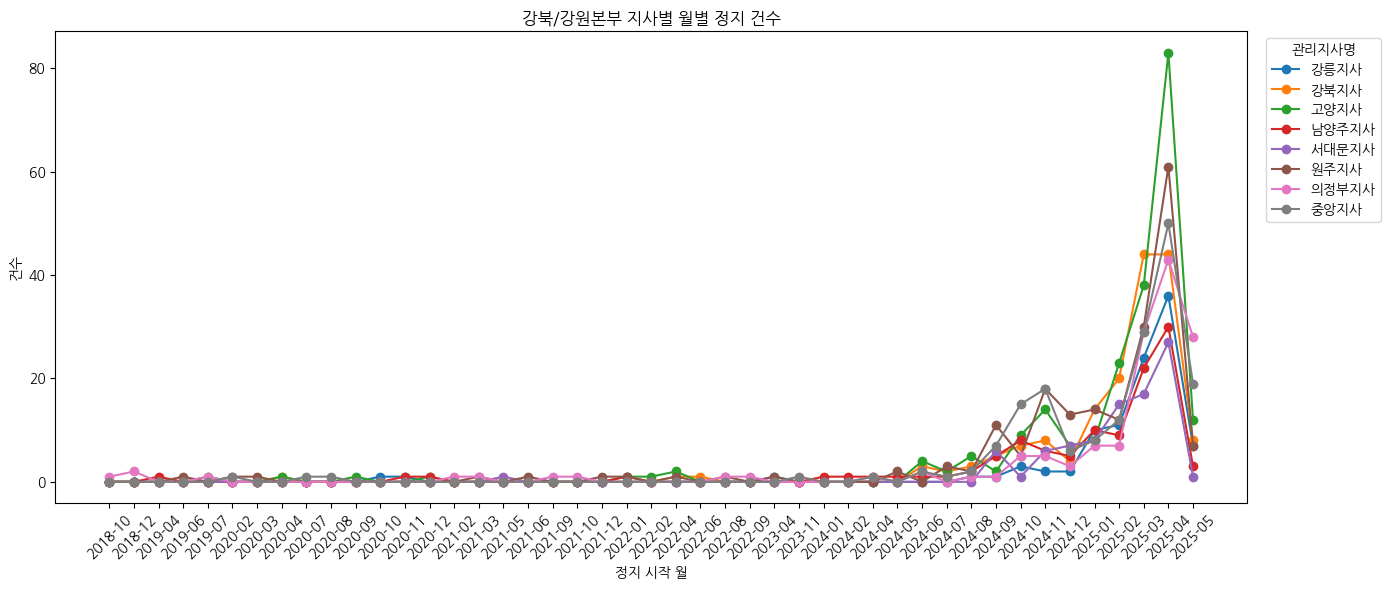

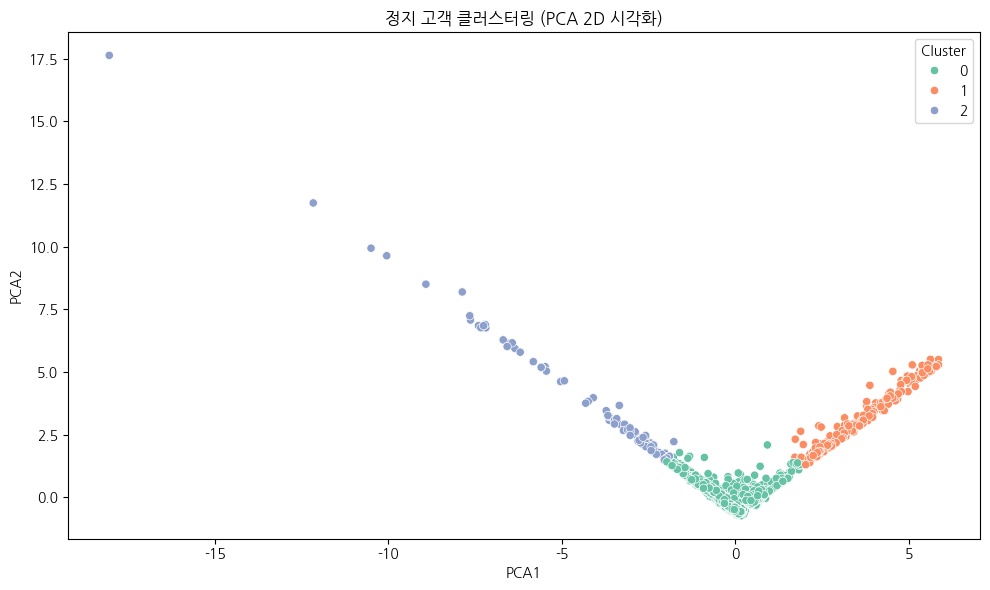

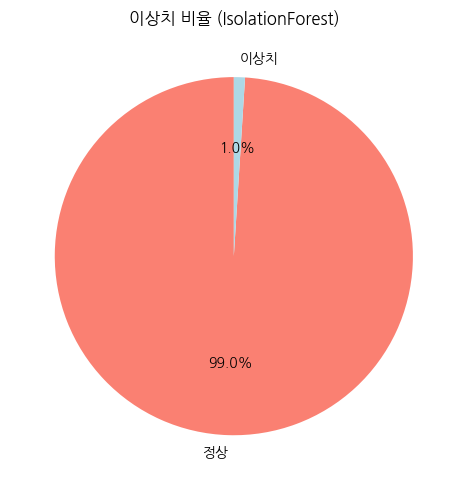

,KTT월정료,정지일수,건수
Cluster,,,
0,56352.138667,98.873956,5387
1,33643.953368,1544.062176,193
2,540843.598361,69.868852,122


In [ ]:
# ✅ 1. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 2. 라이브러리
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest

# ✅ 3. 파일 경로
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'

# ✅ 4. 데이터 로드 및 전처리
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['정지시작일자'] = pd.to_datetime(df['정지시작일자'], errors='coerce')
df['정지시작_월'] = df['정지시작일자'].dt.to_period('M').astype(str)

df['정지일수 구간'] = df['정지일수'].apply(lambda x: '89일 이하' if x <= 89 else '90~119일' if x <= 119 else '120~149일' if x <= 149 else '150일 이상')
df['월정료 구간'] = df['KTT월정료'].apply(lambda x: '5만 이하' if x <= 50000 else '5만~7만' if x <= 70000 else '7만~10만' if x <= 100000 else '10만~20만' if x <= 200000 else '20만~50만' if x <= 500000 else '50만 초과')

# ✅ 히트맵
pivot_data = df.groupby(['월정료 구간', '정지일수 구간']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlOrBr')
plt.title('월정료 구간 vs 정지일수 구간별 계약건수')
plt.tight_layout()
plt.show()

# ✅ 시계열 분석 (강북/강원본부)
df_g = df[df['관리본부명'].str.strip() == '강북/강원본부']
gisa_monthly = df_g.groupby(['관리지사명', '정지시작_월']).size().reset_index(name='건수')
gisa_pivot = gisa_monthly.pivot(index='정지시작_월', columns='관리지사명', values='건수').fillna(0)

plt.figure(figsize=(14, 6))
for col in gisa_pivot.columns:
    plt.plot(gisa_pivot.index, gisa_pivot[col], marker='o', label=col)
plt.title('강북/강원본부 지사별 월별 정지 건수')
plt.xlabel('정지 시작 월')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.legend(title='관리지사명', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

# ✅ 머신러닝 분석
ml_df = df[['KTT월정료', '정지일수']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(ml_df)

kmeans = KMeans(n_clusters=3, random_state=42)
ml_df['Cluster'] = kmeans.fit_predict(X_scaled)

iso = IsolationForest(contamination=0.01, random_state=42)
df['이상치여부'] = iso.fit_predict(X_scaled)
df['이상치여부'] = df['이상치여부'].map({1: '정상', -1: '이상치'})

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
ml_df['PCA1'], ml_df['PCA2'] = components[:, 0], components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=ml_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("정지 고객 클러스터링 (PCA 2D 시각화)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 5))
df['이상치여부'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['salmon', 'lightblue'])
plt.title('이상치 비율 (IsolationForest)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# ✅ 클러스터 요약
cluster_summary = ml_df.groupby('Cluster').agg({
    'KTT월정료': 'mean',
    '정지일수': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': '건수'})

from IPython.display import display
display(cluster_summary)

Mounted at /content/drive


<ipython-input-48-a19e421e0665>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='정지시작_요일', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set3')


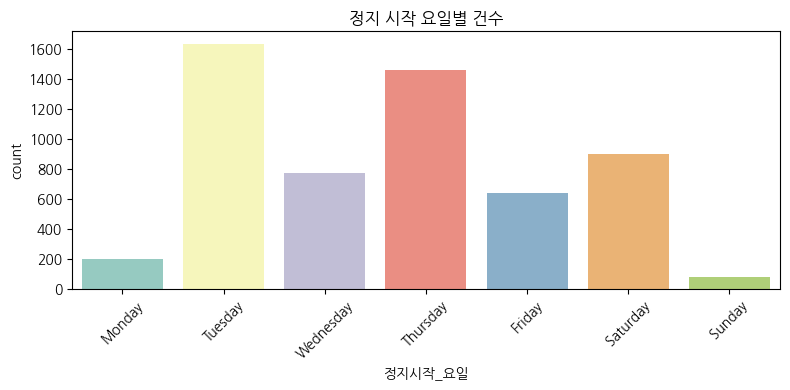

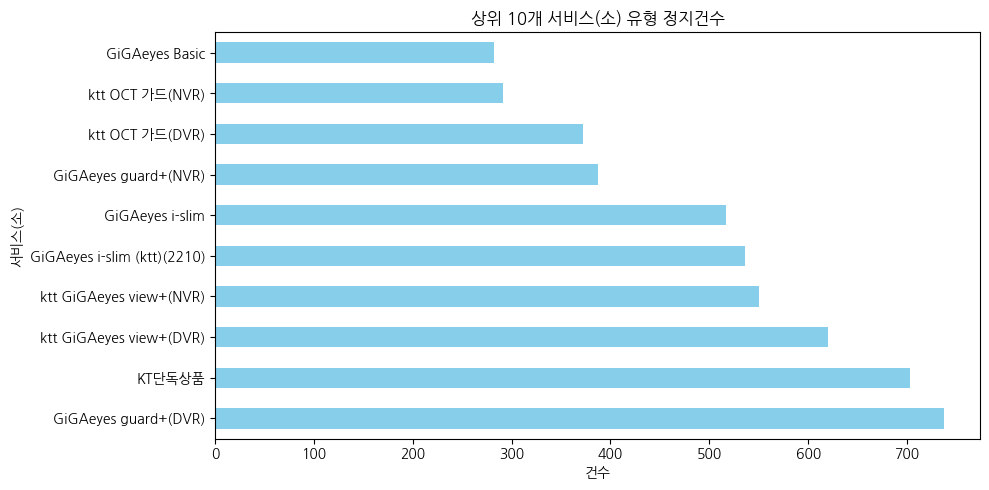

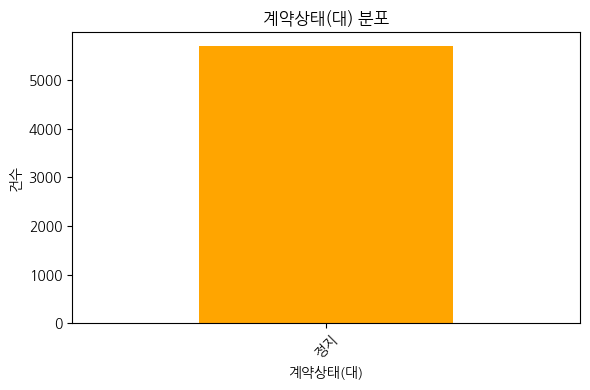

,정지일수,KTT월정료
사업용구분,,
비사업용,147.18488,65946.530959
영업용,61.00000,84000.000000


In [ ]:
# ✅ 1. 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# ✅ 2. 라이브러리 로드
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 3. 데이터 불러오기
file_path = '/content/drive/MyDrive/시설/정지/정지0507.csv'
df = pd.read_csv(file_path, encoding='cp949')
df.columns = df.columns.str.strip()

# ✅ 4. 데이터 정제
df['KTT월정료'] = pd.to_numeric(df['KTT월정료'], errors='coerce')
df['정지일수'] = pd.to_numeric(df['정지일수'], errors='coerce')
df['정지시작일자'] = pd.to_datetime(df['정지시작일자'], errors='coerce')
df['정지시작_월'] = df['정지시작일자'].dt.to_period('M').astype(str)
df['정지시작_요일'] = df['정지시작일자'].dt.day_name()

# ✅ 5. 요일별 정지건수 시각화
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='정지시작_요일', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='Set3')
plt.title('정지 시작 요일별 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 6. 서비스(소)별 정지건수 상위 10개
plt.figure(figsize=(10, 5))
df['서비스(소)'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('상위 10개 서비스(소) 유형 정지건수')
plt.xlabel('건수')
plt.tight_layout()
plt.show()

# ✅ 7. 계약상태(대) 분포 시각화
plt.figure(figsize=(6, 4))
df['계약상태(대)'].value_counts().plot(kind='bar', color='orange')
plt.title('계약상태(대) 분포')
plt.ylabel('건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ✅ 8. 사업용구분별 정지 평균 비교
df['사업용구분'] = df['사업용구분'].fillna('미정')
biz_avg = df.groupby('사업용구분')[['정지일수', 'KTT월정료']].mean().sort_values('정지일수', ascending=False)
from IPython.display import display
display(biz_avg)